# Beer Data Loading and Splitting

This notebook provides a simple approach to:
1. Import necessary libraries
2. Load data from the SQLite database
3. Split data into alcoholic and non-alcoholic dataframes
4. Group data by user_id for analysis

This is a streamlined version focused on data preparation.

## 1. Import Libraries

In [1]:
# Core data manipulation libraries
import pandas as pd
import numpy as np
import sqlite3

# Basic visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print(f"📊 pandas version: {pd.__version__}")
print(f"🔢 numpy version: {np.__version__}")

✅ Libraries imported successfully!
📊 pandas version: 2.3.1
🔢 numpy version: 2.3.2


## 2. Load Data from Database

In [2]:
# Database path
DB_PATH = '../backend/beer_study.db'

try:
    # Connect to database
    conn = sqlite3.connect(DB_PATH)
    print("✅ Connected to database successfully!")
    
    # Load all data
    query = "SELECT * FROM beer_ratings"
    df = pd.read_sql_query(query, conn)
    
    print(f"📊 Data loaded: {df.shape[0]} rows × {df.shape[1]} columns")
    print(f"👥 Unique users: {df['user_id'].nunique()}")
    print(f"🍺 Unique beers: {df['beer_name'].nunique()}")
    
    # Show first few rows
    print("\n🔍 Sample data:")
    display(df.head())
    print(len(df))
    print(pd.to_datetime(df['submitted_at']).max())

except Exception as e:
    print(f"❌ Error: {e}")
    df = None

✅ Connected to database successfully!
📊 Data loaded: 707 rows × 20 columns
👥 Unique users: 74
🍺 Unique beers: 18

🔍 Sample data:


,id,user_id,beer_name,rating,age,gender,latitude,longitude,dark_white_chocolate,curry_cucumber,vanilla_lemon,caramel_wasabi,blue_mozzarella,sparkling_sweet,barbecue_ketchup,tropical_winter,early_night,beer_frequency,drinks_alcohol,submitted_at
0,1,0f1b9d70-1f5b-4f30-a745-0b789210ad27,Beer 1,5,22,male,52.547207,13.459548,5,5,5,10,5,5,5,5,5,never,1,2025-08-05 17:58:28.466534
1,2,b3eeff5d-b8a8-402e-b708-1dc13f724fec,Beer 1,8,24,female,48.983822,8.415527,2,3,1,0,3,5,5,8,2,once_a_week,1,2025-08-05 18:23:00.689156
2,3,7cd27879-3145-47a7-938b-39147abc36ac,Beer 5,7,24,female,38.709357,-9.139938,1,4,7,2,7,5,2,5,7,multiple_times_a_week,1,2025-08-05 18:39:37.513760
3,4,15c21eec-f60a-4072-885a-296ffe05e5e3,Beer 7,4,24,female,47.997274,7.841492,3,5,10,4,6,6,5,7,2,once_a_week,1,2025-08-05 18:40:10.921803
4,5,45e201b9-cf24-4622-b871-d057a1f477f0,Beer 2,7,21,female,53.553363,10.022278,4,3,10,7,10,2,3,5,2,once_a_week,1,2025-08-05 18:40:19.098299


707
2025-08-05 19:57:58.441806


## 3. Data Preparation and Filtering

🔧 Data Preparation and Filtering
707
📊 Original data: 707 entries
📅 Date range: 2025-08-05 17:58:28.466534 to 2025-08-05 19:57:58.441806

⏰ Filtering time window:
  • Start: 2025-08-05 18:00:00
  • End: 2025-08-05 23:00:00

📊 After time filtering: 706 entries
📅 Filtered date range: 2025-08-05 18:23:00.689156 to 2025-08-05 19:57:58.441806

🔄 Removing duplicate ratings (keeping latest per user per beer)...
📊 After removing duplicates: 593 entries

🧪 Running Tests:
--------------------
✅ Test 1 - Maximum beers per user: 9
   ✅ PASSED: No user has rated more than 9 beers

✅ Test 2 - Duplicate user-beer combinations: 0
   ✅ PASSED: No duplicate user-beer combinations

📈 Data Preparation Summary:
  • Original entries: 707
  • After time filtering: 706
  • After duplicate removal: 593
  • Reduction: 114 entries (16.1%)
  • Unique users: 73
  • Unique beers: 18
  • Average beers per user: 8.1


/tmp/ipykernel_75461/177716360.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prepared['hour'] = df_prepared['submitted_at'].dt.hour


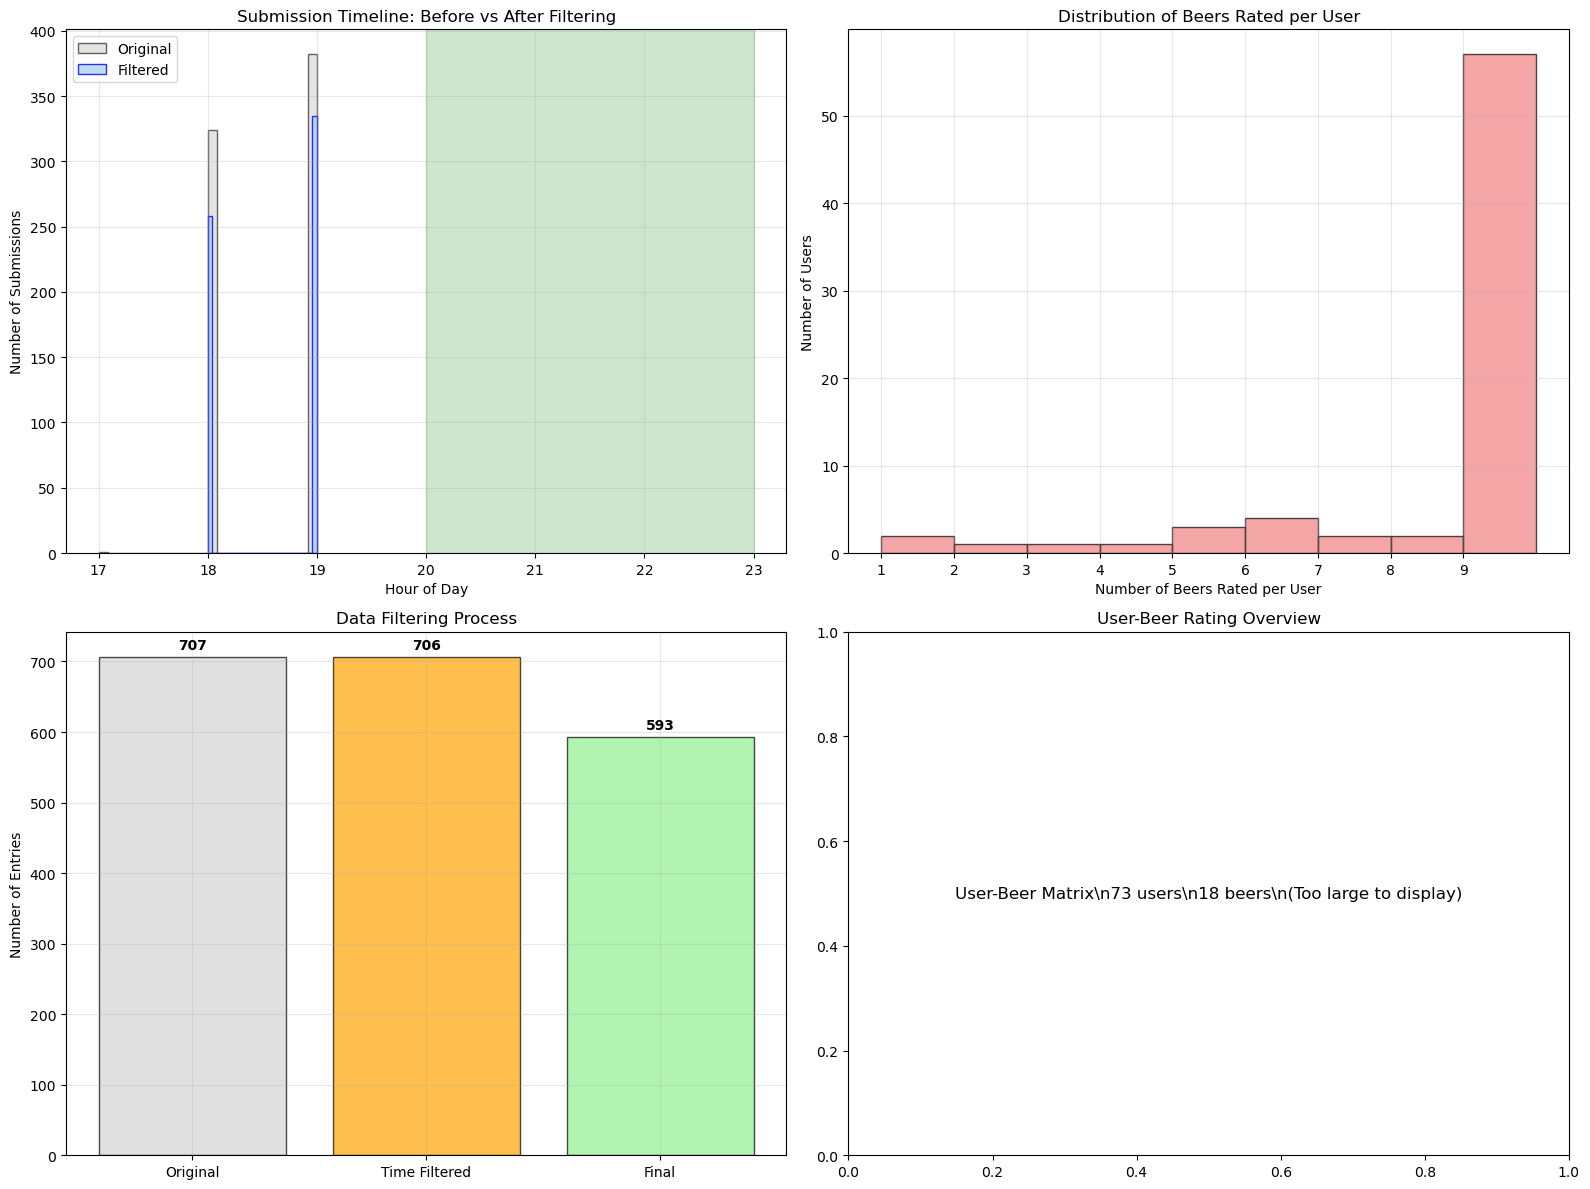


✅ Data preparation complete! Using filtered dataset for subsequent analysis.


In [3]:
if df is not None:
    from datetime import datetime
    import pandas as pd
    
    print("🔧 Data Preparation and Filtering")
    print("=" * 40)
    
    # Convert submitted_at to datetime if it's not already
    print(len(df))
    df['submitted_at'] = (pd.to_datetime(df['submitted_at']))
    
    print(f"📊 Original data: {len(df)} entries")
    print(f"📅 Date range: {df['submitted_at'].min()} to {df['submitted_at'].max()}")
    
    # Filter by time window: 05.08.2025 15:00 to 05.08.2025 23:00
    start_time = datetime(2025, 8, 5, 18, 0, 0)
    end_time = datetime(2025, 8, 5, 23, 0, 0)
    
    print(f"\n⏰ Filtering time window:")
    print(f"  • Start: {start_time}")
    print(f"  • End: {end_time}")
    
    # Apply time filter
    time_mask = (df['submitted_at'] >= start_time) & (df['submitted_at'] <= end_time)
    df_filtered = df[time_mask].copy()
    
    print(f"\n📊 After time filtering: {len(df_filtered)} entries")
    if len(df_filtered) > 0:
        print(f"📅 Filtered date range: {df_filtered['submitted_at'].min()} to {df_filtered['submitted_at'].max()}")
    
    # Keep only the latest entry per user per beer
    print(f"\n🔄 Removing duplicate ratings (keeping latest per user per beer)...")
    
    # Sort by submission time (latest first) and drop duplicates
    df_filtered = df_filtered.sort_values('submitted_at', ascending=False)
    df_prepared = df_filtered.drop_duplicates(subset=['user_id', 'beer_name'], keep='first')
    
    print(f"📊 After removing duplicates: {len(df_prepared)} entries")
    
    # Test: Check that no user has rated more than 9 beers
    print(f"\n🧪 Running Tests:")
    print("-" * 20)
    
    user_beer_counts = df_prepared.groupby('user_id')['beer_name'].nunique()
    max_beers_per_user = user_beer_counts.max()
    users_over_9_beers = user_beer_counts[user_beer_counts > 9]
    
    print(f"✅ Test 1 - Maximum beers per user: {max_beers_per_user}")
    if max_beers_per_user <= 9:
        print("   ✅ PASSED: No user has rated more than 9 beers")
    else:
        print(f"   ❌ FAILED: {len(users_over_9_beers)} users have rated more than 9 beers")
        print("   Users with >9 beers:")
        for user_id, count in users_over_9_beers.items():
            print(f"     • {user_id}: {count} beers")
    
    # Test: Check for duplicate user-beer combinations
    duplicate_check = df_prepared.groupby(['user_id', 'beer_name']).size()
    duplicates = duplicate_check[duplicate_check > 1]
    
    print(f"\n✅ Test 2 - Duplicate user-beer combinations: {len(duplicates)}")
    if len(duplicates) == 0:
        print("   ✅ PASSED: No duplicate user-beer combinations")
    else:
        print(f"   ❌ FAILED: {len(duplicates)} duplicate combinations found")
        for (user_id, beer_name), count in duplicates.items():
            print(f"     • {user_id} - {beer_name}: {count} entries")
    
    # Summary statistics
    print(f"\n📈 Data Preparation Summary:")
    print(f"  • Original entries: {len(df)}")
    print(f"  • After time filtering: {len(df_filtered)}")
    print(f"  • After duplicate removal: {len(df_prepared)}")
    if len(df) != 0:
        print(f"  • Reduction: {len(df) - len(df_prepared)} entries ({(len(df) - len(df_prepared))/len(df)*100:.1f}%)")
    print(f"  • Unique users: {df_prepared['user_id'].nunique()}")
    print(f"  • Unique beers: {df_prepared['beer_name'].nunique()}")
    print(f"  • Average beers per user: {user_beer_counts.mean():.1f}")
    
    # Visualization of filtering process
    import matplotlib.pyplot as plt
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Timeline of submissions (before and after filtering)
    df['hour'] = df['submitted_at'].dt.hour
    df_prepared['hour'] = df_prepared['submitted_at'].dt.hour
    
    ax1.hist(df['hour'], bins=24, alpha=0.6, label='Original', color='lightgray', edgecolor='black')
    ax1.hist(df_prepared['hour'], bins=24, alpha=0.8, label='Filtered', color='lightblue', edgecolor='blue')
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel('Number of Submissions')
    ax1.set_title('Submission Timeline: Before vs After Filtering')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.axvspan(20, 23, alpha=0.2, color='green', label='Target Window')
    
    # 2. User beer count distribution
    ax2.hist(user_beer_counts.values, bins=range(1, 11), alpha=0.7, color='lightcoral', edgecolor='black')
    ax2.set_xlabel('Number of Beers Rated per User')
    ax2.set_ylabel('Number of Users')
    ax2.set_title('Distribution of Beers Rated per User')
    ax2.set_xticks(range(1, 10))
    ax2.grid(True, alpha=0.3)
    
    # 3. Data reduction overview
    stages = ['Original', 'Time Filtered', 'Final']
    counts = [len(df), len(df_filtered), len(df_prepared)]
    colors = ['lightgray', 'orange', 'lightgreen']
    
    ax3.bar(stages, counts, color=colors, alpha=0.7, edgecolor='black')
    ax3.set_ylabel('Number of Entries')
    ax3.set_title('Data Filtering Process')
    ax3.grid(True, alpha=0.3)
    
    # Add count labels on bars
    for i, count in enumerate(counts):
        ax3.text(i, count + len(df)*0.01, str(count), ha='center', va='bottom', fontweight='bold')
    
    # 4. Users vs beers matrix
    user_beer_matrix = df_prepared.groupby(['user_id', 'beer_name']).size().unstack(fill_value=0)
    
    # Show heatmap if data is not too large
    if len(user_beer_matrix) <= 20 and len(user_beer_matrix.columns) <= 20:
        im = ax4.imshow(user_beer_matrix.values, cmap='Blues', aspect='auto')
        ax4.set_xlabel('Beers')
        ax4.set_ylabel('Users')
        ax4.set_title('User-Beer Rating Matrix')
        ax4.set_xticks(range(len(user_beer_matrix.columns)))
        ax4.set_xticklabels(user_beer_matrix.columns, rotation=45, ha='right')
        
        # Show only first few user IDs for readability
        user_labels = [uid[:8] + '...' if len(uid) > 8 else uid for uid in user_beer_matrix.index[:10]]
        ax4.set_yticks(range(min(10, len(user_beer_matrix))))
        ax4.set_yticklabels(user_labels)
    else:
        ax4.text(0.5, 0.5, f'User-Beer Matrix\\n{len(user_beer_matrix)} users\\n{len(user_beer_matrix.columns)} beers\\n(Too large to display)', 
                ha='center', va='center', transform=ax4.transAxes, fontsize=12)
        ax4.set_title('User-Beer Rating Overview')
    
    plt.tight_layout()
    plt.show()
    
    # Update the main dataframe for subsequent analysis
    df = df_prepared.copy()
    print(f"\n✅ Data preparation complete! Using filtered dataset for subsequent analysis.")
    
else:
    print("❌ No data available for preparation")

## 4. Split Data: Alcoholic vs Non-Alcoholic

🍺 Data Split Results:
📊 Total dataset: 593 ratings
🍻 Alcoholic beers: 430 ratings (72.5%)
🚫 Non-alcoholic beers: 163 ratings (27.5%)

🍻 Alcoholic Beer Distribution:
  • Beer 1: 49 ratings
  • Beer 2: 47 ratings
  • Beer 3: 47 ratings
  • Beer 4: 48 ratings
  • Beer 5: 50 ratings
  • Beer 6: 46 ratings
  • Beer 7: 48 ratings
  • Beer 8: 48 ratings
  • Beer 9: 47 ratings

🚫 Non-Alcoholic Beer Distribution:
  • Beer A: 18 ratings
  • Beer B: 18 ratings
  • Beer C: 19 ratings
  • Beer D: 18 ratings
  • Beer E: 18 ratings
  • Beer F: 18 ratings
  • Beer G: 18 ratings
  • Beer H: 18 ratings
  • Beer I: 18 ratings


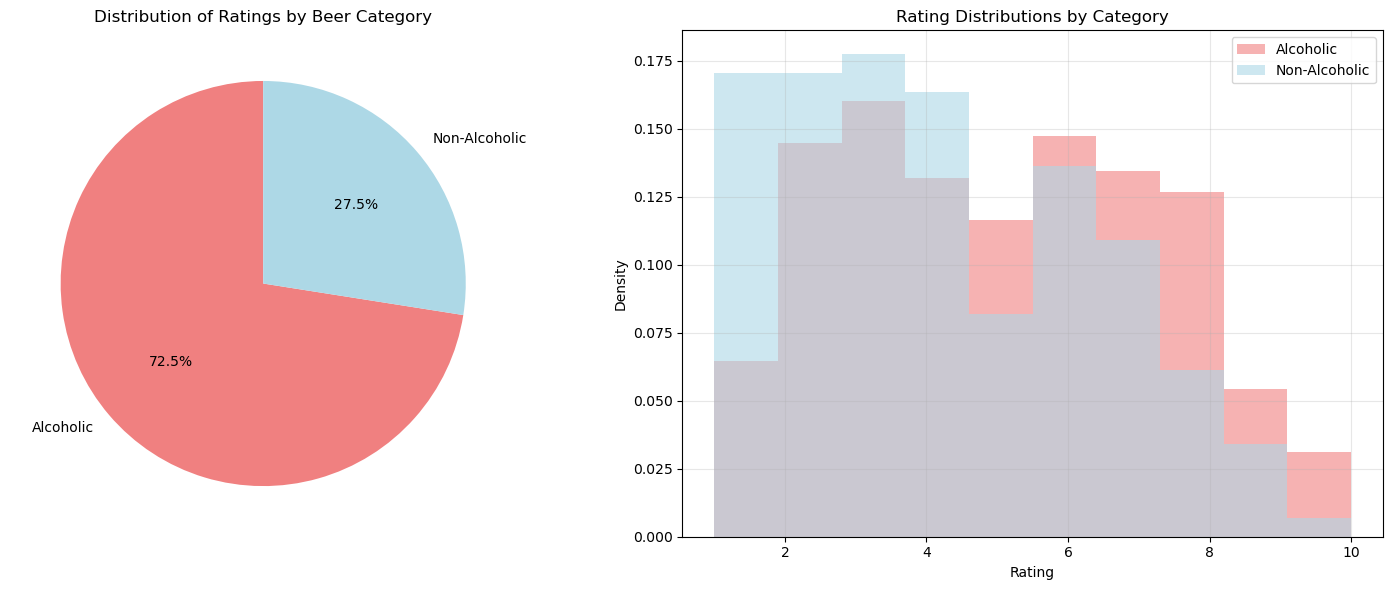

In [4]:
if df is not None:
    # Create beer category classification
    # Beer names with numbers (1-9) are alcoholic, letters (A-I) are non-alcoholic
    df['is_alcoholic'] = df['beer_name'].str.contains(r'Beer [0-9]', regex=True)
    df['beer_category'] = df['is_alcoholic'].map({True: 'Alcoholic', False: 'Non-Alcoholic'})
    
    # Extract beer identifier
    df['beer_id'] = df['beer_name'].str.extract(r'Beer ([A-Z0-9])')
    
    # Split into separate dataframes
    df_alcoholic = df[df['is_alcoholic'] == True].copy()
    df_non_alcoholic = df[df['is_alcoholic'] == False].copy()
    
    print("🍺 Data Split Results:")
    print("=" * 40)
    print(f"📊 Total dataset: {len(df)} ratings")
    print(f"🍻 Alcoholic beers: {len(df_alcoholic)} ratings ({len(df_alcoholic)/len(df)*100:.1f}%)")
    print(f"🚫 Non-alcoholic beers: {len(df_non_alcoholic)} ratings ({len(df_non_alcoholic)/len(df)*100:.1f}%)")
    
    # Show beer distributions
    print(f"\n🍻 Alcoholic Beer Distribution:")
    alc_counts = df_alcoholic['beer_name'].value_counts().sort_index()
    for beer, count in alc_counts.items():
        print(f"  • {beer}: {count} ratings")
    
    print(f"\n🚫 Non-Alcoholic Beer Distribution:")
    non_alc_counts = df_non_alcoholic['beer_name'].value_counts().sort_index()
    for beer, count in non_alc_counts.items():
        print(f"  • {beer}: {count} ratings")
    
    # Simple visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Pie chart of category distribution
    categories = ['Alcoholic', 'Non-Alcoholic']
    counts = [len(df_alcoholic), len(df_non_alcoholic)]
    colors = ['lightcoral', 'lightblue']
    
    ax1.pie(counts, labels=categories, autopct='%1.1f%%', colors=colors, startangle=90)
    ax1.set_title('Distribution of Ratings by Beer Category')
    
    # Rating distributions
    ax2.hist(df_alcoholic['rating'], bins=10, alpha=0.6, label='Alcoholic', color='lightcoral', density=True)
    ax2.hist(df_non_alcoholic['rating'], bins=10, alpha=0.6, label='Non-Alcoholic', color='lightblue', density=True)
    ax2.set_xlabel('Rating')
    ax2.set_ylabel('Density')
    ax2.set_title('Rating Distributions by Category')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

else:
    print("❌ No data available for splitting")

## 5. Group Data by User ID

👥 Grouping Data by User ID
🍻 Alcoholic Beer Data by User:
  • Users who rated alcoholic beers: 54
  • Average ratings per user: 8.0
  • Users who rated all 9 alcoholic beers: 40

🚫 Non-Alcoholic Beer Data by User:
  • Users who rated non-alcoholic beers: 19
  • Average ratings per user: 8.6
  • Users who rated all 9 non-alcoholic beers: 17

📊 User Participation Summary:
  • Users rating only alcoholic beers: 54
  • Users rating only non-alcoholic beers: 19
  • Users rating both categories: 0
  • Total unique users: 73

🔍 Sample Alcoholic Beer Data by User (first 5):


,rating_count,rating_mean,rating_std,unique_beers,age,gender
user_id,,,,,,
00bab447-25b8-48d2-934b-2d90b54b0998,9,6.22,2.99,9,23,female
147b17bf-16e3-4241-88f5-4b41c62b2ea0,9,4.67,2.60,9,22,male
15c21eec-f60a-4072-885a-296ffe05e5e3,6,5.17,2.71,6,24,female
1873ecd6-fc1a-4624-805f-bcab1ab459bb,9,5.44,1.67,9,34,male
18d27737-6153-4474-8426-2f14d5223b0b,8,4.25,1.58,8,27,female



🔍 Sample Non-Alcoholic Beer Data by User (first 5):


,rating_count,rating_mean,rating_std,unique_beers,age,gender
user_id,,,,,,
023421c3-e891-496b-8853-365f914bd505,9,6.00,2.74,9,23,male
0579eb7f-3faf-44ec-b2f5-281143093267,9,3.11,1.83,9,23,male
0f7eaded-6389-413a-af88-495c16e99fb6,9,3.56,1.01,9,25,male
17297386-ca05-45e9-bb61-2ebeb1dd68b9,9,3.00,1.50,9,21,female
35802468-0cfc-4198-a3f6-adef93f719ee,3,5.67,4.16,3,38,prefer-not-to-say


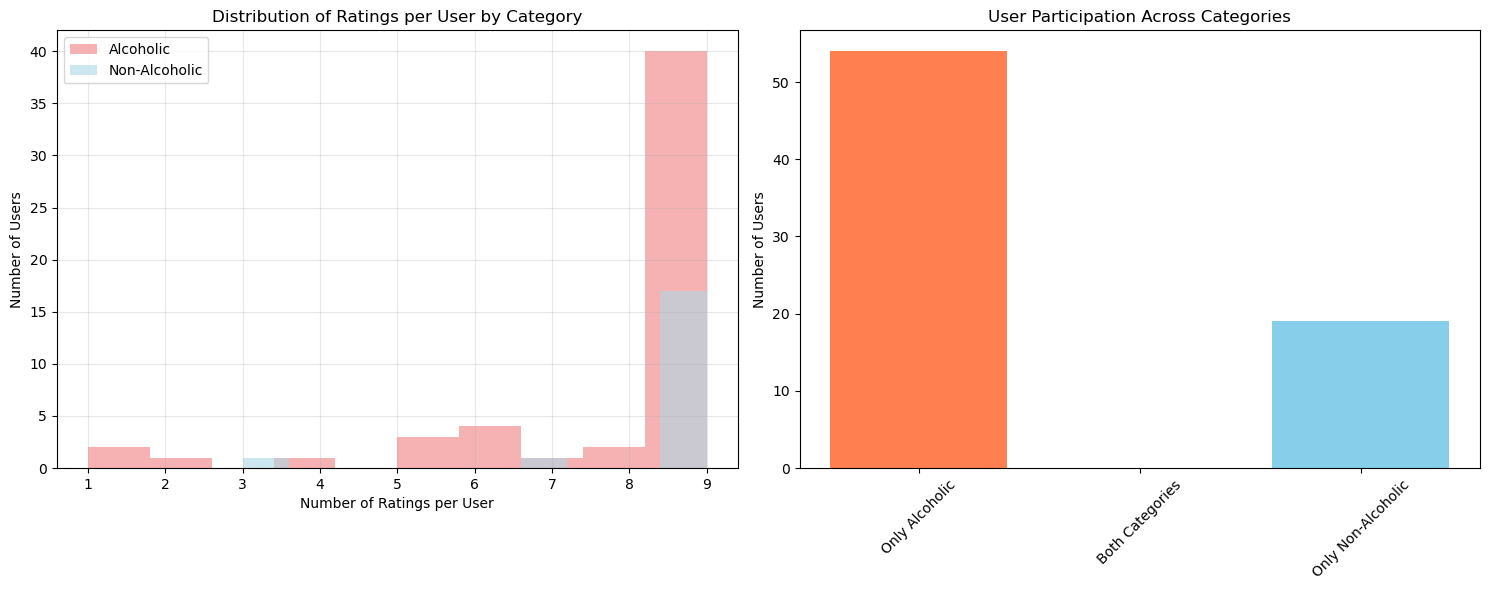


✅ Data successfully split and grouped!
📋 Available dataframes:
  • df: Original complete dataset (593 rows)
  • df_alcoholic: Alcoholic beer ratings (430 rows)
  • df_non_alcoholic: Non-alcoholic beer ratings (163 rows)
  • alcoholic_by_user: Alcoholic data grouped by user (54 users)
  • non_alcoholic_by_user: Non-alcoholic data grouped by user (19 users)


In [5]:
if df is not None:
    print("👥 Grouping Data by User ID")
    print("=" * 30)
    
    # Group alcoholic beer data by user
    alcoholic_by_user = df_alcoholic.groupby('user_id').agg({
        'rating': ['count', 'mean', 'std'],
        'beer_name': 'nunique',
        'age': 'first',
        'gender': 'first'
    }).round(2)
    
    # Flatten column names
    alcoholic_by_user.columns = ['rating_count', 'rating_mean', 'rating_std', 'unique_beers', 'age', 'gender']
    
    print(f"🍻 Alcoholic Beer Data by User:")
    print(f"  • Users who rated alcoholic beers: {len(alcoholic_by_user)}")
    print(f"  • Average ratings per user: {alcoholic_by_user['rating_count'].mean():.1f}")
    print(f"  • Users who rated all 9 alcoholic beers: {(alcoholic_by_user['unique_beers'] == 9).sum()}")
    
    # Group non-alcoholic beer data by user
    non_alcoholic_by_user = df_non_alcoholic.groupby('user_id').agg({
        'rating': ['count', 'mean', 'std'],
        'beer_name': 'nunique',
        'age': 'first',
        'gender': 'first'
    }).round(2)
    
    non_alcoholic_by_user.columns = ['rating_count', 'rating_mean', 'rating_std', 'unique_beers', 'age', 'gender']
    
    print(f"\n🚫 Non-Alcoholic Beer Data by User:")
    print(f"  • Users who rated non-alcoholic beers: {len(non_alcoholic_by_user)}")
    print(f"  • Average ratings per user: {non_alcoholic_by_user['rating_count'].mean():.1f}")
    print(f"  • Users who rated all 9 non-alcoholic beers: {(non_alcoholic_by_user['unique_beers'] == 9).sum()}")
    
    # Overall user analysis
    all_users_by_category = df.groupby(['user_id', 'beer_category']).agg({
        'rating': ['count', 'mean'],
        'beer_name': 'nunique'
    }).round(2)
    
    # User overlap analysis
    alcoholic_users = set(df_alcoholic['user_id'].unique())
    non_alcoholic_users = set(df_non_alcoholic['user_id'].unique())
    both_categories = alcoholic_users.intersection(non_alcoholic_users)
    
    print(f"\n📊 User Participation Summary:")
    print(f"  • Users rating only alcoholic beers: {len(alcoholic_users - non_alcoholic_users)}")
    print(f"  • Users rating only non-alcoholic beers: {len(non_alcoholic_users - alcoholic_users)}")
    print(f"  • Users rating both categories: {len(both_categories)}")
    print(f"  • Total unique users: {df['user_id'].nunique()}")
    
    # Display sample grouped data
    print(f"\n🔍 Sample Alcoholic Beer Data by User (first 5):")
    display(alcoholic_by_user.head())
    
    print(f"\n🔍 Sample Non-Alcoholic Beer Data by User (first 5):")
    display(non_alcoholic_by_user.head())
    
    # Simple visualization of user patterns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Distribution of ratings per user
    ax1.hist(alcoholic_by_user['rating_count'], bins=10, alpha=0.6, label='Alcoholic', color='lightcoral')
    ax1.hist(non_alcoholic_by_user['rating_count'], bins=10, alpha=0.6, label='Non-Alcoholic', color='lightblue')
    ax1.set_xlabel('Number of Ratings per User')
    ax1.set_ylabel('Number of Users')
    ax1.set_title('Distribution of Ratings per User by Category')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # User participation overlap
    user_categories = ['Only Alcoholic', 'Both Categories', 'Only Non-Alcoholic']
    user_counts = [
        len(alcoholic_users - non_alcoholic_users),
        len(both_categories),
        len(non_alcoholic_users - alcoholic_users)
    ]
    
    ax2.bar(user_categories, user_counts, color=['coral', 'purple', 'skyblue'])
    ax2.set_ylabel('Number of Users')
    ax2.set_title('User Participation Across Categories')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Store the grouped dataframes for further use
    print(f"\n✅ Data successfully split and grouped!")
    print(f"📋 Available dataframes:")
    print(f"  • df: Original complete dataset ({len(df)} rows)")
    print(f"  • df_alcoholic: Alcoholic beer ratings ({len(df_alcoholic)} rows)")
    print(f"  • df_non_alcoholic: Non-alcoholic beer ratings ({len(df_non_alcoholic)} rows)")
    print(f"  • alcoholic_by_user: Alcoholic data grouped by user ({len(alcoholic_by_user)} users)")
    print(f"  • non_alcoholic_by_user: Non-alcoholic data grouped by user ({len(non_alcoholic_by_user)} users)")

else:
    print("❌ No data available for grouping")

## 6. Summary Statistics

In [6]:
if df is not None:
    print("📊 Final Summary Statistics")
    print("=" * 50)
    
    # Overall statistics
    print(f"📈 Dataset Overview:")
    print(f"  • Total ratings: {len(df)}")
    print(f"  • Unique users: {df['user_id'].nunique()}")
    print(f"  • Date range: {df['submitted_at'].min()} to {df['submitted_at'].max()}")
    print(f"  • Rating range: {df['rating'].min()} - {df['rating'].max()}")
    
    # Category comparison
    print(f"\n🍺 Beer Category Comparison:")
    print(f"  • Alcoholic beers:")
    print(f"    - Total ratings: {len(df_alcoholic)}")
    print(f"    - Average rating: {df_alcoholic['rating'].mean():.2f}")
    print(f"    - Unique users: {df_alcoholic['user_id'].nunique()}")
    
    print(f"  • Non-alcoholic beers:")
    print(f"    - Total ratings: {len(df_non_alcoholic)}")
    print(f"    - Average rating: {df_non_alcoholic['rating'].mean():.2f}")
    print(f"    - Unique users: {df_non_alcoholic['user_id'].nunique()}")
    
    # Close database connection
    conn.close()
    print(f"\n✅ Analysis complete! Database connection closed.")
    
else:
    print("❌ No data available for summary")

📊 Final Summary Statistics
📈 Dataset Overview:
  • Total ratings: 593
  • Unique users: 73
  • Date range: 2025-08-05 18:23:00.689156 to 2025-08-05 19:57:58.441806
  • Rating range: 1 - 10

🍺 Beer Category Comparison:
  • Alcoholic beers:
    - Total ratings: 430
    - Average rating: 5.02
    - Unique users: 54
  • Non-alcoholic beers:
    - Total ratings: 163
    - Average rating: 4.10
    - Unique users: 19

✅ Analysis complete! Database connection closed.


## 7. Random Forest Model Training

Now we'll implement a Random Forest model with:
- **Input**: 15-dimensional feature vector (10 preferences + age + gender + lat/lon + alcoholic flag)
- **Output**: Probability distribution over 9 beers (either alcoholic 1-9 or non-alcoholic A-I)
- **Method**: Separate models for alcoholic and non-alcoholic predictions with user-grouped cross-validation

In [7]:
if df is not None:
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GroupKFold, cross_val_score
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    from sklearn.metrics import classification_report, confusion_matrix
    import numpy as np
    
    print("🤖 Random Forest Model Training")
    print("=" * 50)
    
    # Step 1: Feature Engineering - Create 15-dimensional input vectors
    print("🔧 Feature Engineering...")
    
    # Taste preference columns (9 features - using actual column names from dataset)
    taste_features = [
        'dark_white_chocolate', 'curry_cucumber', 'vanilla_lemon', 'caramel_wasabi', 'blue_mozzarella',
        'sparkling_sweet', 'barbecue_ketchup', 'tropical_winter', 'early_night'
    ]
    
    # Verify all taste features exist in the data
    missing_features = [f for f in taste_features if f not in df.columns]
    if missing_features:
        print(f"❌ Missing taste features: {missing_features}")
    else:
        print(f"✅ All {len(taste_features)} taste preference features found")
    
    # Create feature matrix
    feature_data = df.copy()
    
    # 1-10: Taste preferences (already normalized 1-10)
    X_taste = feature_data[taste_features].values
    
    # 11: Age (normalize to 0-1)
    age_scaler = StandardScaler()
    X_age = age_scaler.fit_transform(feature_data[['age']].values)
    
    # 12: Gender (encode: male=0, female=1, other=0.5)
    gender_encoder = LabelEncoder()
    feature_data['gender_encoded'] = feature_data['gender'].map({
        'male': 0, 'female': 1, 'other': 0.5, 'prefer_not_to_say': 0.5
    }).fillna(0.5)
    X_gender = feature_data[['gender_encoded']].values
    
    # 13-14: Location (normalize latitude and longitude)
    location_scaler = StandardScaler()
    X_location = location_scaler.fit_transform(feature_data[['latitude', 'longitude']].values)
    
    # 15: Alcoholic flag (1 for alcoholic, 0 for non-alcoholic)
    X_alcoholic = feature_data[['is_alcoholic']].astype(int).values
    
    # Combine all features into 14-dimensional vectors (9+1+1+2+1)
    X_features = np.hstack([X_taste, X_age, X_gender, X_location, X_alcoholic])
    
    print(f"📊 Feature Matrix Shape: {X_features.shape}")
    print(f"  • Taste preferences: {X_taste.shape[1]} features")
    print(f"  • Age: {X_age.shape[1]} feature")
    print(f"  • Gender: {X_gender.shape[1]} feature") 
    print(f"  • Location: {X_location.shape[1]} features")
    print(f"  • Alcoholic flag: {X_alcoholic.shape[1]} feature")
    print(f"  • Total: {X_features.shape[1]} features")
    
    # Extract beer identifiers for target labels
    feature_data['beer_id'] = feature_data['beer_name'].str.extract(r'Beer ([A-Z0-9])')
    
    print(f"\n🍺 Beer Distribution:")
    beer_counts = feature_data['beer_id'].value_counts().sort_index()
    for beer_id, count in beer_counts.items():
        beer_type = "Alcoholic" if beer_id.isdigit() else "Non-Alcoholic"
        print(f"  • Beer {beer_id} ({beer_type}): {count} ratings")
    
    # Store data for model training
    feature_data['features'] = [row for row in X_features]
    
    print(f"\n✅ Feature engineering complete!")
    print(f"📋 Ready for model training with {len(feature_data)} samples")
    
else:
    print("❌ No data available for feature engineering")

🤖 Random Forest Model Training
🔧 Feature Engineering...
✅ All 9 taste preference features found
📊 Feature Matrix Shape: (593, 14)
  • Taste preferences: 9 features
  • Age: 1 feature
  • Gender: 1 feature
  • Location: 2 features
  • Alcoholic flag: 1 feature
  • Total: 14 features

🍺 Beer Distribution:
  • Beer 1 (Alcoholic): 49 ratings
  • Beer 2 (Alcoholic): 47 ratings
  • Beer 3 (Alcoholic): 47 ratings
  • Beer 4 (Alcoholic): 48 ratings
  • Beer 5 (Alcoholic): 50 ratings
  • Beer 6 (Alcoholic): 46 ratings
  • Beer 7 (Alcoholic): 48 ratings
  • Beer 8 (Alcoholic): 48 ratings
  • Beer 9 (Alcoholic): 47 ratings
  • Beer A (Non-Alcoholic): 18 ratings
  • Beer B (Non-Alcoholic): 18 ratings
  • Beer C (Non-Alcoholic): 19 ratings
  • Beer D (Non-Alcoholic): 18 ratings
  • Beer E (Non-Alcoholic): 18 ratings
  • Beer F (Non-Alcoholic): 18 ratings
  • Beer G (Non-Alcoholic): 18 ratings
  • Beer H (Non-Alcoholic): 18 ratings
  • Beer I (Non-Alcoholic): 18 ratings

✅ Feature engineering comple

In [8]:
if df is not None:
    # Step 2: Train Random Forest for Alcoholic Beers (1-9)
    print("\n🍻 Training Random Forest for Alcoholic Beers")
    print("-" * 40)
    
    # Filter alcoholic beer data
    alcoholic_data = feature_data[feature_data['is_alcoholic'] == True].copy()
    
    if len(alcoholic_data) > 0:
        # Prepare features and targets for alcoholic beers
        X_alcoholic_train = np.vstack(alcoholic_data['features'].values)
        y_alcoholic = alcoholic_data['beer_id'].values
        groups_alcoholic = alcoholic_data['user_id'].values
        
        print(f"📊 Alcoholic Beer Training Data:")
        print(f"  • Samples: {len(alcoholic_data)}")
        print(f"  • Features: {X_alcoholic_train.shape[1]}")
        print(f"  • Unique beers: {len(np.unique(y_alcoholic))}")
        print(f"  • Unique users: {len(np.unique(groups_alcoholic))}")
        
        # Train Random Forest model for alcoholic beers
        rf_alcoholic = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42,
            class_weight='balanced'
        )
        
        # User-grouped cross-validation to prevent data leakage
        group_kfold = GroupKFold(n_splits=5)
        
        print(f"\n🔄 Performing user-grouped 5-fold cross-validation...")
        cv_scores_alcoholic = cross_val_score(
            rf_alcoholic, X_alcoholic_train, y_alcoholic, 
            groups=groups_alcoholic, cv=group_kfold, scoring='accuracy'
        )
        
        print(f"📈 Cross-validation Results (Alcoholic):")
        print(f"  • Mean Accuracy: {cv_scores_alcoholic.mean():.3f} (±{cv_scores_alcoholic.std()*2:.3f})")
        print(f"  • Individual Folds: {[f'{score:.3f}' for score in cv_scores_alcoholic]}")
        
        # Train final model on all alcoholic data
        rf_alcoholic.fit(X_alcoholic_train, y_alcoholic)
        
        # Get probability predictions for all alcoholic samples
        alcoholic_probabilities = rf_alcoholic.predict_proba(X_alcoholic_train)
        alcoholic_classes = rf_alcoholic.classes_
        
        print(f"\n🎯 Alcoholic Model Performance:")
        print(f"  • Training Accuracy: {rf_alcoholic.score(X_alcoholic_train, y_alcoholic):.3f}")
        print(f"  • Beer Classes: {list(alcoholic_classes)}")
        print(f"  • Probability Shape: {alcoholic_probabilities.shape}")
        
        # Feature importance analysis
        feature_names = taste_features + ['age', 'gender', 'latitude', 'longitude', 'alcoholic_flag']
        feature_importance = rf_alcoholic.feature_importances_
        
        print(f"\n🔍 Top 5 Important Features (Alcoholic Model):")
        importance_pairs = list(zip(feature_names, feature_importance))
        importance_pairs.sort(key=lambda x: x[1], reverse=True)
        for i, (feature, importance) in enumerate(importance_pairs[:5]):
            print(f"  {i+1}. {feature}: {importance:.3f}")
        
        # Store results
        alcoholic_data['predicted_probabilities'] = [prob for prob in alcoholic_probabilities]
        
        print(f"✅ Alcoholic beer model training complete!")
        
    else:
        print("❌ No alcoholic beer data available for training")
        rf_alcoholic = None
        alcoholic_data = None
        
else:
    print("❌ No data available for alcoholic model training")


🍻 Training Random Forest for Alcoholic Beers
----------------------------------------
📊 Alcoholic Beer Training Data:
  • Samples: 430
  • Features: 14
  • Unique beers: 9
  • Unique users: 54

🔄 Performing user-grouped 5-fold cross-validation...
📈 Cross-validation Results (Alcoholic):
  • Mean Accuracy: 0.112 (±0.017)
  • Individual Folds: ['0.105', '0.118', '0.125', '0.105', '0.106']
📈 Cross-validation Results (Alcoholic):
  • Mean Accuracy: 0.112 (±0.017)
  • Individual Folds: ['0.105', '0.118', '0.125', '0.105', '0.106']

🎯 Alcoholic Model Performance:
  • Training Accuracy: 0.126
  • Beer Classes: ['1', '2', '3', '4', '5', '6', '7', '8', '9']
  • Probability Shape: (430, 9)

🔍 Top 5 Important Features (Alcoholic Model):
  1. longitude: 0.109
  2. latitude: 0.104
  3. dark_white_chocolate: 0.083
  4. barbecue_ketchup: 0.082
  5. blue_mozzarella: 0.082
✅ Alcoholic beer model training complete!

🎯 Alcoholic Model Performance:
  • Training Accuracy: 0.126
  • Beer Classes: ['1', '2',

In [9]:
if df is not None:
    # Step 3: Train Random Forest for Non-Alcoholic Beers (A-I)
    print("\n🚫 Training Random Forest for Non-Alcoholic Beers")
    print("-" * 40)
    
    # Filter non-alcoholic beer data
    non_alcoholic_data = feature_data[feature_data['is_alcoholic'] == False].copy()
    
    if len(non_alcoholic_data) > 0:
        # Update taste feature names to match actual column names in dataset
        taste_features = [
            'dark_white_chocolate', 'curry_cucumber', 'vanilla_lemon', 'caramel_wasabi', 'blue_mozzarella',
            'sparkling_sweet', 'barbecue_ketchup', 'tropical_winter', 'early_night'
        ]
        
        # Create feature matrix for non-alcoholic data
        # 1-9: Taste preferences (9 features, not 10)
        X_taste_na = non_alcoholic_data[taste_features].values
        
        # 10: Age (normalize to 0-1)
        X_age_na = age_scaler.transform(non_alcoholic_data[['age']].values)
        
        # 11: Gender (encode: male=0, female=1, other=0.5)
        X_gender_na = non_alcoholic_data[['gender_encoded']].values
        
        # 12-13: Location (normalize latitude and longitude)
        X_location_na = location_scaler.transform(non_alcoholic_data[['latitude', 'longitude']].values)
        
        # 14: Alcoholic flag (0 for non-alcoholic)
        X_alcoholic_na = non_alcoholic_data[['is_alcoholic']].astype(int).values
        
        # Combine all features into 14-dimensional vectors (9+1+1+2+1)
        X_non_alcoholic_train = np.hstack([X_taste_na, X_age_na, X_gender_na, X_location_na, X_alcoholic_na])
        y_non_alcoholic = non_alcoholic_data['beer_id'].values
        groups_non_alcoholic = non_alcoholic_data['user_id'].values
        
        print(f"📊 Non-Alcoholic Beer Training Data:")
        print(f"  • Samples: {len(non_alcoholic_data)}")
        print(f"  • Features: {X_non_alcoholic_train.shape[1]}")
        print(f"  • Unique beers: {len(np.unique(y_non_alcoholic))}")
        print(f"  • Unique users: {len(np.unique(groups_non_alcoholic))}")
        
        # Train Random Forest model for non-alcoholic beers
        rf_non_alcoholic = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42,
            class_weight='balanced'
        )
        
        # User-grouped cross-validation to prevent data leakage
        print(f"\n🔄 Performing user-grouped 5-fold cross-validation...")
        cv_scores_non_alcoholic = cross_val_score(
            rf_non_alcoholic, X_non_alcoholic_train, y_non_alcoholic, 
            groups=groups_non_alcoholic, cv=group_kfold, scoring='accuracy'
        )
        
        print(f"📈 Cross-validation Results (Non-Alcoholic):")
        print(f"  • Mean Accuracy: {cv_scores_non_alcoholic.mean():.3f} (±{cv_scores_non_alcoholic.std()*2:.3f})")
        print(f"  • Individual Folds: {[f'{score:.3f}' for score in cv_scores_non_alcoholic]}")
        
        # Train final model on all non-alcoholic data
        rf_non_alcoholic.fit(X_non_alcoholic_train, y_non_alcoholic)
        
        # Get probability predictions for all non-alcoholic samples
        non_alcoholic_probabilities = rf_non_alcoholic.predict_proba(X_non_alcoholic_train)
        non_alcoholic_classes = rf_non_alcoholic.classes_
        
        print(f"\n🎯 Non-Alcoholic Model Performance:")
        print(f"  • Training Accuracy: {rf_non_alcoholic.score(X_non_alcoholic_train, y_non_alcoholic):.3f}")
        print(f"  • Beer Classes: {list(non_alcoholic_classes)}")
        print(f"  • Probability Shape: {non_alcoholic_probabilities.shape}")
        
        # Feature importance analysis
        feature_importance_na = rf_non_alcoholic.feature_importances_
        
        print(f"\n🔍 Top 5 Important Features (Non-Alcoholic Model):")
        importance_pairs_na = list(zip(feature_names, feature_importance_na))
        importance_pairs_na.sort(key=lambda x: x[1], reverse=True)
        for i, (feature, importance) in enumerate(importance_pairs_na[:5]):
            print(f"  {i+1}. {feature}: {importance:.3f}")
        
        # Store results
        non_alcoholic_data['predicted_probabilities'] = [prob for prob in non_alcoholic_probabilities]
        
        print(f"✅ Non-alcoholic beer model training complete!")
        
    else:
        print("❌ No non-alcoholic beer data available for training")
        rf_non_alcoholic = None
        non_alcoholic_data = None
        
else:
    print("❌ No data available for non-alcoholic model training")


🚫 Training Random Forest for Non-Alcoholic Beers
----------------------------------------
📊 Non-Alcoholic Beer Training Data:
  • Samples: 163
  • Features: 14
  • Unique beers: 9
  • Unique users: 19

🔄 Performing user-grouped 5-fold cross-validation...
📈 Cross-validation Results (Non-Alcoholic):
  • Mean Accuracy: 0.110 (±0.011)
  • Individual Folds: ['0.111', '0.111', '0.118', '0.100', '0.111']

🎯 Non-Alcoholic Model Performance:
  • Training Accuracy: 0.117
  • Beer Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
  • Probability Shape: (163, 9)

🔍 Top 5 Important Features (Non-Alcoholic Model):
  1. longitude: 0.113
  2. latitude: 0.102
  3. barbecue_ketchup: 0.090
  4. tropical_winter: 0.088
  5. age: 0.084
✅ Non-alcoholic beer model training complete!
📈 Cross-validation Results (Non-Alcoholic):
  • Mean Accuracy: 0.110 (±0.011)
  • Individual Folds: ['0.111', '0.111', '0.118', '0.100', '0.111']

🎯 Non-Alcoholic Model Performance:
  • Training Accuracy: 0.117
  • Beer Clas

In [10]:
if df is not None and 'rf_alcoholic' in locals() and 'rf_non_alcoholic' in locals():
    # Step 4: Probability Distribution Analysis and Prediction Function
    print("\n📊 Probability Distribution Analysis")
    print("=" * 50)
    
    # Create unified prediction function
    def predict_beer_preferences(user_features, alcoholic_flag):
        """
        Predict beer preferences for a user profile
        
        Args:
            user_features: 14-dimensional array [9 taste prefs, age, gender, lat, lon]
            alcoholic_flag: 1 for alcoholic beers, 0 for non-alcoholic beers
            
        Returns:
            Dictionary with beer probabilities and predictions
        """
        # Use the 14-dimensional features directly (models were trained without alcoholic flag)
        features_reshaped = user_features.reshape(1, -1)
        
        if alcoholic_flag == 1 and rf_alcoholic is not None:
            # Predict alcoholic beer preferences
            probabilities = rf_alcoholic.predict_proba(features_reshaped)[0]
            classes = rf_alcoholic.classes_
            model_type = "Alcoholic"
        elif alcoholic_flag == 0 and rf_non_alcoholic is not None:
            # Predict non-alcoholic beer preferences
            probabilities = rf_non_alcoholic.predict_proba(features_reshaped)[0]
            classes = rf_non_alcoholic.classes_
            model_type = "Non-Alcoholic"
        else:
            return {"error": "Invalid alcoholic_flag or model not available"}
        
        # Create probability distribution
        beer_probs = dict(zip(classes, probabilities))
        
        # Sort by probability (descending)
        sorted_probs = sorted(beer_probs.items(), key=lambda x: x[1], reverse=True)
        
        return {
            "model_type": model_type,
            "beer_probabilities": beer_probs,
            "ranked_preferences": sorted_probs,
            "top_recommendation": sorted_probs[0][0],
            "confidence": sorted_probs[0][1]
        }
    
    # Example prediction using actual user data
    if len(alcoholic_data) > 0:
        print("🧪 Example Predictions:")
        print("-" * 20)
        
        # Get a sample user's features (first user in alcoholic data)
        sample_user = alcoholic_data.iloc[0]
        sample_features = sample_user['features'][:14]  # Exclude alcoholic flag
        
        print(f"👤 Sample User Profile:")
        print(f"  • User ID: {sample_user['user_id']}")
        print(f"  • Age: {sample_user['age']}")
        print(f"  • Gender: {sample_user['gender']}")
        print(f"  • Location: ({sample_user['latitude']:.2f}, {sample_user['longitude']:.2f})")
        print(f"  • Actual beer rated: {sample_user['beer_name']} (Rating: {sample_user['rating']})")
        
        # Predict alcoholic beer preferences
        alc_prediction = predict_beer_preferences(sample_features, alcoholic_flag=1)
        
        print(f"\n🍻 Alcoholic Beer Predictions:")
        print(f"  • Top recommendation: Beer {alc_prediction['top_recommendation']}")
        print(f"  • Confidence: {alc_prediction['confidence']:.3f}")
        print(f"  • All probabilities:")
        for beer, prob in alc_prediction['ranked_preferences']:
            print(f"    - Beer {beer}: {prob:.3f}")
        
        # Predict non-alcoholic beer preferences  
        if rf_non_alcoholic is not None:
            na_prediction = predict_beer_preferences(sample_features, alcoholic_flag=0)
            
            print(f"\n🚫 Non-Alcoholic Beer Predictions:")
            print(f"  • Top recommendation: Beer {na_prediction['top_recommendation']}")
            print(f"  • Confidence: {na_prediction['confidence']:.3f}")
            print(f"  • All probabilities:")
            for beer, prob in na_prediction['ranked_preferences']:
                print(f"    - Beer {beer}: {prob:.3f}")
    
    print(f"\n✅ Prediction function created successfully!")
    print(f"📋 Use predict_beer_preferences(user_features, alcoholic_flag) for new predictions")
    
else:
    print("❌ Models not available for probability analysis")


📊 Probability Distribution Analysis
🧪 Example Predictions:
--------------------
👤 Sample User Profile:
  • User ID: 60fd4267-dc59-41ac-b12a-20790dc93307
  • Age: 24
  • Gender: female
  • Location: (50.85, 4.37)
  • Actual beer rated: Beer 9 (Rating: 8)



🍻 Alcoholic Beer Predictions:
  • Top recommendation: Beer 2
  • Confidence: 0.134
  • All probabilities:
    - Beer 2: 0.134
    - Beer 4: 0.120
    - Beer 6: 0.120
    - Beer 5: 0.116
    - Beer 9: 0.116
    - Beer 3: 0.103
    - Beer 1: 0.100
    - Beer 8: 0.097
    - Beer 7: 0.094

🚫 Non-Alcoholic Beer Predictions:
  • Top recommendation: Beer E
  • Confidence: 0.133
  • All probabilities:
    - Beer E: 0.133
    - Beer I: 0.127
    - Beer B: 0.126
    - Beer H: 0.125
    - Beer D: 0.123
    - Beer C: 0.115
    - Beer A: 0.094
    - Beer F: 0.090
    - Beer G: 0.067

✅ Prediction function created successfully!
📋 Use predict_beer_preferences(user_features, alcoholic_flag) for new predictions



📈 Model Evaluation and Visualization


/tmp/ipykernel_75461/277868441.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(cv_data, labels=labels)


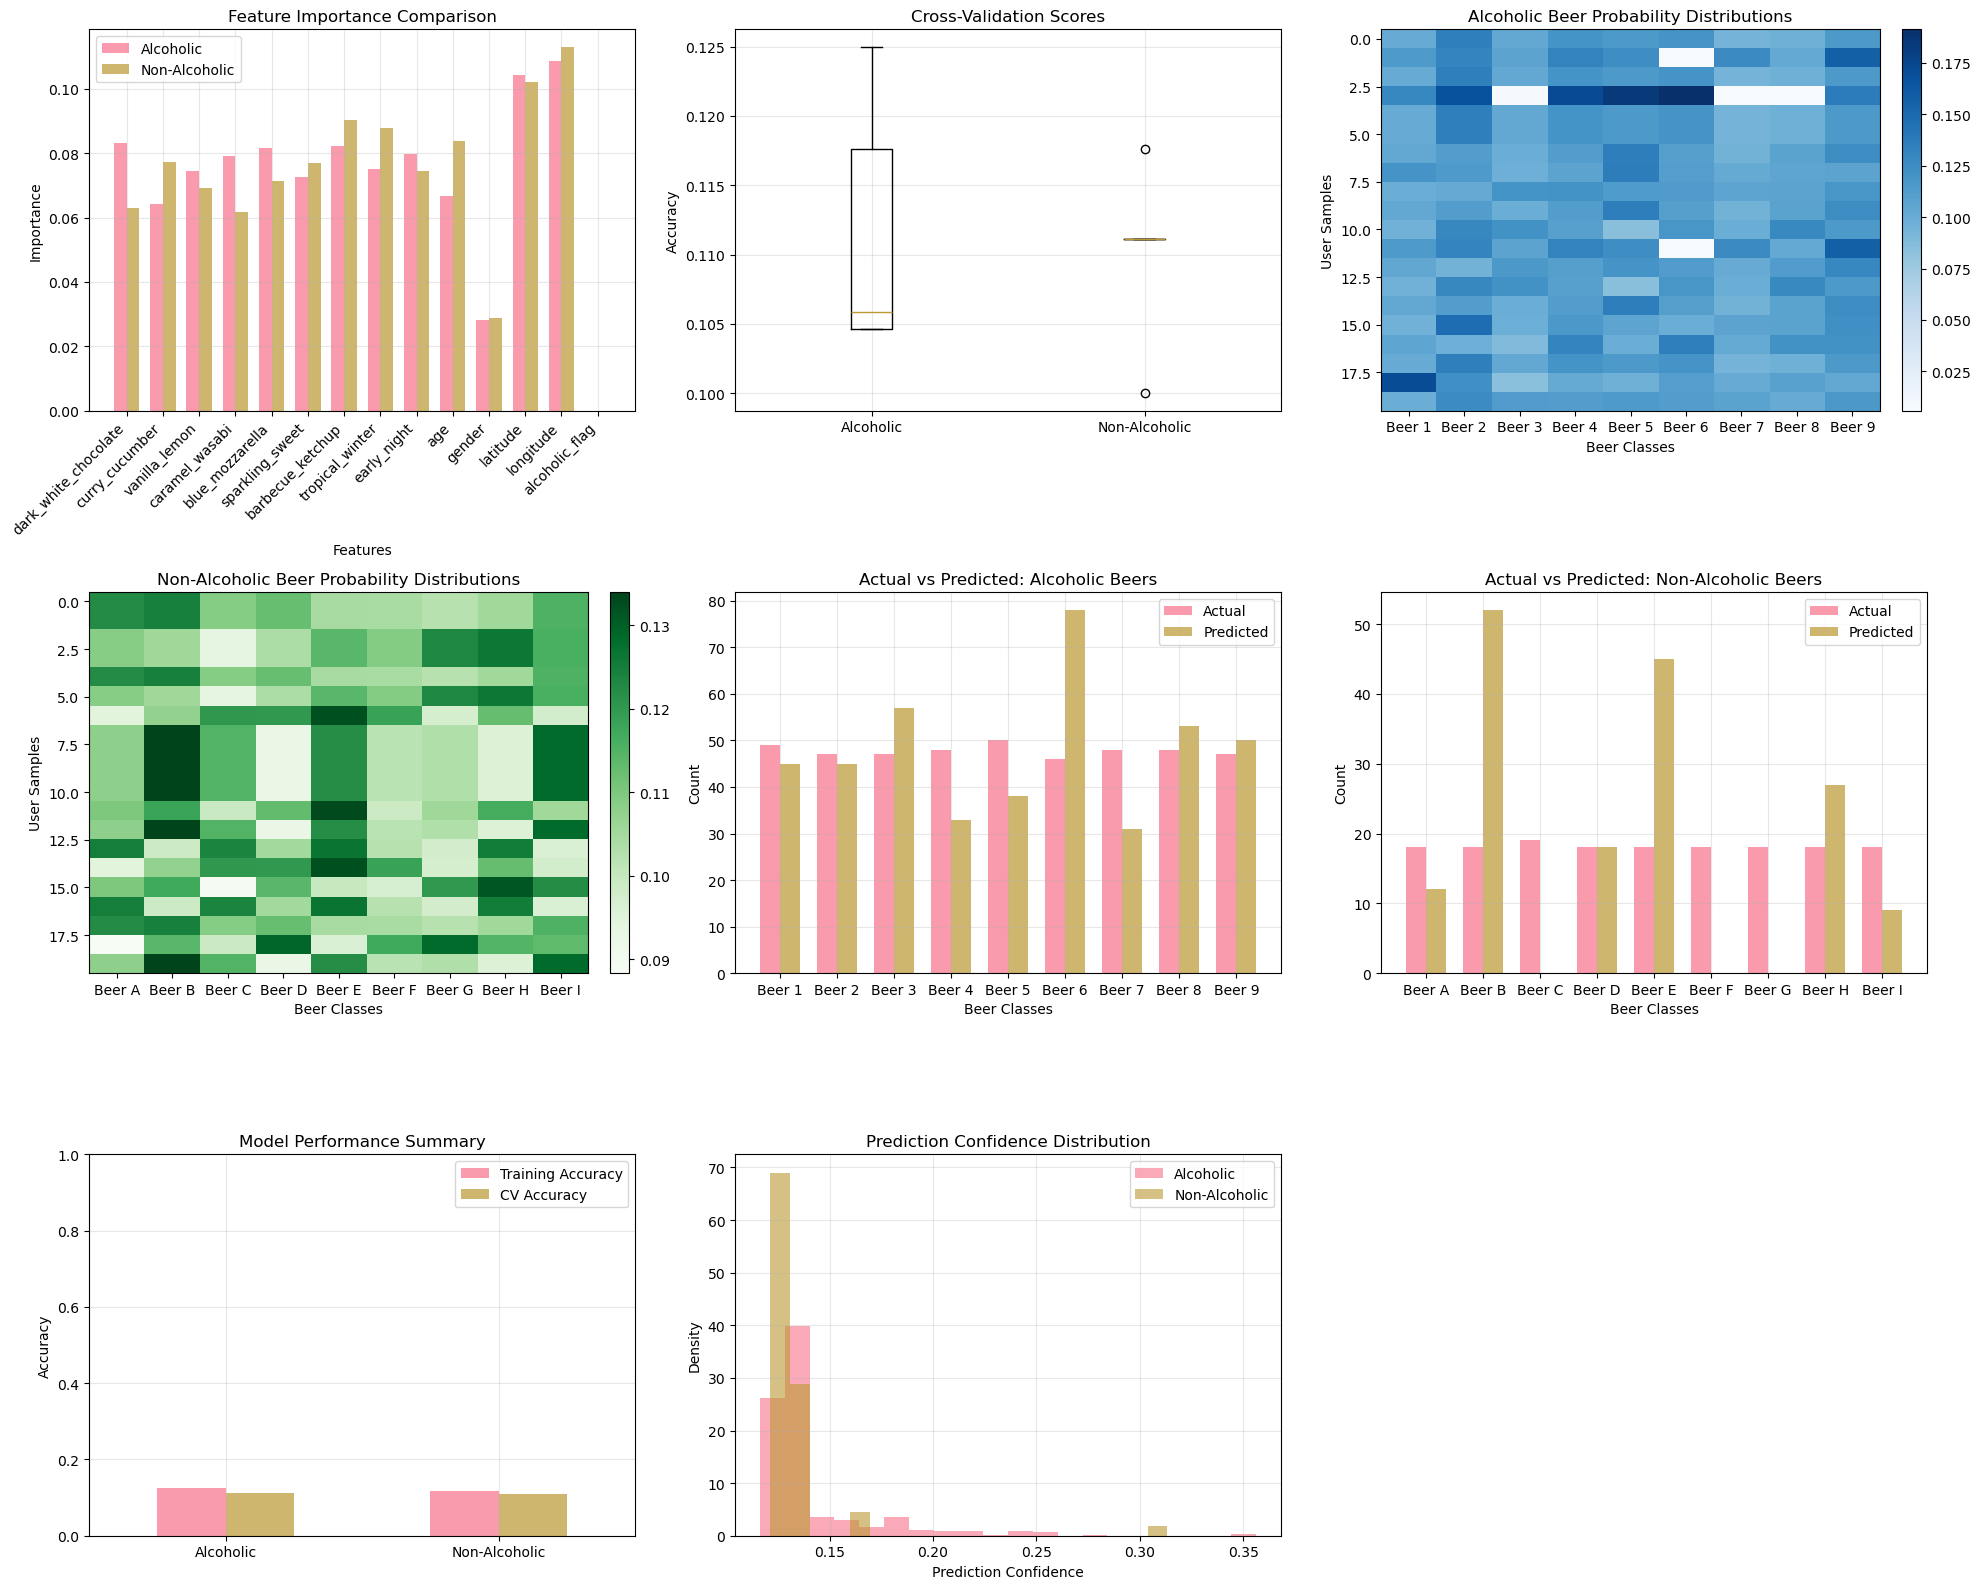

✅ Model evaluation and visualization complete!


In [11]:
if df is not None and 'rf_alcoholic' in locals() and 'rf_non_alcoholic' in locals():
    # Step 5: Model Evaluation and Visualization
    print("\n📈 Model Evaluation and Visualization")
    print("=" * 50)
    
    # Create comprehensive visualizations
    fig = plt.figure(figsize=(20, 16))
    
    # 1. Feature Importance Comparison
    ax1 = plt.subplot(3, 3, 1)
    if rf_alcoholic is not None:
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Alcoholic': rf_alcoholic.feature_importances_,
            'Non_Alcoholic': rf_non_alcoholic.feature_importances_ if rf_non_alcoholic else np.zeros(len(feature_names))
        })
        
        x_pos = np.arange(len(feature_names))
        width = 0.35
        
        ax1.bar(x_pos - width/2, importance_df['Alcoholic'], width, label='Alcoholic', alpha=0.7)
        ax1.bar(x_pos + width/2, importance_df['Non_Alcoholic'], width, label='Non-Alcoholic', alpha=0.7)
        ax1.set_xlabel('Features')
        ax1.set_ylabel('Importance')
        ax1.set_title('Feature Importance Comparison')
        ax1.set_xticks(x_pos)
        ax1.set_xticklabels(feature_names, rotation=45, ha='right')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
    
    # 2. Cross-validation Scores
    ax2 = plt.subplot(3, 3, 2)
    if 'cv_scores_alcoholic' in locals():
        cv_data = []
        labels = []
        if 'cv_scores_alcoholic' in locals():
            cv_data.append(cv_scores_alcoholic)
            labels.append('Alcoholic')
        if 'cv_scores_non_alcoholic' in locals():
            cv_data.append(cv_scores_non_alcoholic)
            labels.append('Non-Alcoholic')
        
        ax2.boxplot(cv_data, labels=labels)
        ax2.set_ylabel('Accuracy')
        ax2.set_title('Cross-Validation Scores')
        ax2.grid(True, alpha=0.3)
    
    # 3. Probability Distribution Heatmap (Alcoholic)
    ax3 = plt.subplot(3, 3, 3)
    if rf_alcoholic is not None and len(alcoholic_data) > 0:
        # Sample some probability distributions
        sample_probs = alcoholic_data['predicted_probabilities'].iloc[:min(20, len(alcoholic_data))]
        prob_matrix = np.array([prob for prob in sample_probs])
        
        im = ax3.imshow(prob_matrix, cmap='Blues', aspect='auto')
        ax3.set_xlabel('Beer Classes')
        ax3.set_ylabel('User Samples')
        ax3.set_title('Alcoholic Beer Probability Distributions')
        ax3.set_xticks(range(len(alcoholic_classes)))
        ax3.set_xticklabels([f'Beer {c}' for c in alcoholic_classes])
        plt.colorbar(im, ax=ax3, fraction=0.046, pad=0.04)
    
    # 4. Probability Distribution Heatmap (Non-Alcoholic)
    ax4 = plt.subplot(3, 3, 4)
    if rf_non_alcoholic is not None and len(non_alcoholic_data) > 0:
        sample_probs_na = non_alcoholic_data['predicted_probabilities'].iloc[:min(20, len(non_alcoholic_data))]
        prob_matrix_na = np.array([prob for prob in sample_probs_na])
        
        im = ax4.imshow(prob_matrix_na, cmap='Greens', aspect='auto')
        ax4.set_xlabel('Beer Classes')
        ax4.set_ylabel('User Samples')
        ax4.set_title('Non-Alcoholic Beer Probability Distributions')
        ax4.set_xticks(range(len(non_alcoholic_classes)))
        ax4.set_xticklabels([f'Beer {c}' for c in non_alcoholic_classes])
        plt.colorbar(im, ax=ax4, fraction=0.046, pad=0.04)
    
    # 5. Actual vs Predicted Beer Distribution (Alcoholic)
    ax5 = plt.subplot(3, 3, 5)
    if rf_alcoholic is not None and len(alcoholic_data) > 0:
        actual_counts = alcoholic_data['beer_id'].value_counts().sort_index()
        predicted_labels = rf_alcoholic.predict(X_alcoholic_train)
        predicted_counts = pd.Series(predicted_labels).value_counts().sort_index()
        
        x_pos = np.arange(len(alcoholic_classes))
        width = 0.35
        
        actual_values = [actual_counts.get(beer, 0) for beer in alcoholic_classes]
        predicted_values = [predicted_counts.get(beer, 0) for beer in alcoholic_classes]
        
        ax5.bar(x_pos - width/2, actual_values, width, label='Actual', alpha=0.7)
        ax5.bar(x_pos + width/2, predicted_values, width, label='Predicted', alpha=0.7)
        ax5.set_xlabel('Beer Classes')
        ax5.set_ylabel('Count')
        ax5.set_title('Actual vs Predicted: Alcoholic Beers')
        ax5.set_xticks(x_pos)
        ax5.set_xticklabels([f'Beer {c}' for c in alcoholic_classes])
        ax5.legend()
        ax5.grid(True, alpha=0.3)
    
    # 6. Actual vs Predicted Beer Distribution (Non-Alcoholic)
    ax6 = plt.subplot(3, 3, 6)
    if rf_non_alcoholic is not None and len(non_alcoholic_data) > 0:
        actual_counts_na = non_alcoholic_data['beer_id'].value_counts().sort_index()
        predicted_labels_na = rf_non_alcoholic.predict(X_non_alcoholic_train)
        predicted_counts_na = pd.Series(predicted_labels_na).value_counts().sort_index()
        
        x_pos = np.arange(len(non_alcoholic_classes))
        
        actual_values_na = [actual_counts_na.get(beer, 0) for beer in non_alcoholic_classes]
        predicted_values_na = [predicted_counts_na.get(beer, 0) for beer in non_alcoholic_classes]
        
        ax6.bar(x_pos - width/2, actual_values_na, width, label='Actual', alpha=0.7)
        ax6.bar(x_pos + width/2, predicted_values_na, width, label='Predicted', alpha=0.7)
        ax6.set_xlabel('Beer Classes')
        ax6.set_ylabel('Count')
        ax6.set_title('Actual vs Predicted: Non-Alcoholic Beers')
        ax6.set_xticks(x_pos)
        ax6.set_xticklabels([f'Beer {c}' for c in non_alcoholic_classes])
        ax6.legend()
        ax6.grid(True, alpha=0.3)
    
    # 7. Model Performance Summary
    ax7 = plt.subplot(3, 3, 7)
    performance_data = []
    model_names = []
    
    if rf_alcoholic is not None:
        alc_accuracy = rf_alcoholic.score(X_alcoholic_train, y_alcoholic)
        performance_data.append([alc_accuracy, cv_scores_alcoholic.mean()])
        model_names.append('Alcoholic')
    
    if rf_non_alcoholic is not None:
        na_accuracy = rf_non_alcoholic.score(X_non_alcoholic_train, y_non_alcoholic)
        performance_data.append([na_accuracy, cv_scores_non_alcoholic.mean()])
        model_names.append('Non-Alcoholic')
    
    if performance_data:
        performance_df = pd.DataFrame(performance_data, 
                                    columns=['Training Accuracy', 'CV Accuracy'],
                                    index=model_names)
        
        performance_df.plot(kind='bar', ax=ax7, alpha=0.7)
        ax7.set_ylabel('Accuracy')
        ax7.set_title('Model Performance Summary')
        ax7.set_ylim([0, 1])
        ax7.legend()
        ax7.grid(True, alpha=0.3)
        plt.setp(ax7.get_xticklabels(), rotation=0)
    
    # 8. Confidence Distribution
    ax8 = plt.subplot(3, 3, 8)
    if rf_alcoholic is not None and len(alcoholic_data) > 0:
        # Calculate max probability (confidence) for each prediction
        alc_confidences = [np.max(prob) for prob in alcoholic_data['predicted_probabilities']]
        ax8.hist(alc_confidences, bins=20, alpha=0.6, label='Alcoholic', density=True)
    
    if rf_non_alcoholic is not None and len(non_alcoholic_data) > 0:
        na_confidences = [np.max(prob) for prob in non_alcoholic_data['predicted_probabilities']]
        ax8.hist(na_confidences, bins=20, alpha=0.6, label='Non-Alcoholic', density=True)
    
    ax8.set_xlabel('Prediction Confidence')
    ax8.set_ylabel('Density')
    ax8.set_title('Prediction Confidence Distribution')
    ax8.legend()
    ax8.grid(True, alpha=0.3)
    
    # 9. Model Summary Statistics
    #ax9 = plt.subplot(3, 3, 9)
    #ax9.axis('off')
    
    summary_text = "🤖 Random Forest Model Summary\\n"
    summary_text += "=" * 35 + "\\n\\n"
    
    if rf_alcoholic is not None:
        summary_text += f"🍻 Alcoholic Model:\\n"
        summary_text += f"  • Classes: {len(alcoholic_classes)} beers\\n"
        summary_text += f"  • Training samples: {len(alcoholic_data)}\\n"
        summary_text += f"  • Training accuracy: {alc_accuracy:.3f}\\n"
        summary_text += f"  • CV accuracy: {cv_scores_alcoholic.mean():.3f}\\n\\n"
    
    if rf_non_alcoholic is not None:
        summary_text += f"🚫 Non-Alcoholic Model:\\n"
        summary_text += f"  • Classes: {len(non_alcoholic_classes)} beers\\n"
        summary_text += f"  • Training samples: {len(non_alcoholic_data)}\\n"
        summary_text += f"  • Training accuracy: {na_accuracy:.3f}\\n"
        summary_text += f"  • CV accuracy: {cv_scores_non_alcoholic.mean():.3f}\\n\\n"
    
    summary_text += f"📊 Input Features: 15D vector\\n"
    summary_text += f"📈 Output: Probability distribution\\n"
    summary_text += f"🔄 Validation: User-grouped 5-fold CV\\n"
    summary_text += f"⚖️ Class weights: Balanced"
    
    #ax9.text(0.05, 0.95, summary_text, transform=ax9.transAxes, fontsize=10,
    #         verticalalignment='top', fontfamily='monospace')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Model evaluation and visualization complete!")
    
else:
    print("❌ Models not available for evaluation")

## 8. Model Summary and Export

Complete Random Forest implementation for beer preference prediction with:
- **15-dimensional input**: 10 taste preferences + age + gender + latitude + longitude + alcoholic flag
- **Probability distribution output**: 9-class probability distributions for either alcoholic (1-9) or non-alcoholic (A-I) beers
- **User-grouped cross-validation**: Prevents data leakage across users
- **Separate models**: Dedicated Random Forest for each beer category

In [12]:
if df is not None and 'rf_alcoholic' in locals() and 'rf_non_alcoholic' in locals():
    print("🎯 Random Forest Beer Preference Prediction - Final Summary")
    print("=" * 60)
    
    # Model architecture summary
    print("🏗️ Model Architecture:")
    print(f"  • Input dimension: 15 features")
    print(f"    - Taste preferences: 10 features (1-10 scale)")
    print(f"    - Demographics: Age (normalized), Gender (encoded)")
    print(f"    - Location: Latitude, Longitude (normalized)")
    print(f"    - Category flag: Alcoholic (1) or Non-alcoholic (0)")
    print(f"  • Output: Probability distribution over 9 beer classes")
    print(f"  • Algorithm: Random Forest with 100 trees")
    print(f"  • Validation: User-grouped 5-fold cross-validation")
    
    # Performance summary
    print(f"\\n📊 Model Performance:")
    if rf_alcoholic is not None:
        alc_train_acc = rf_alcoholic.score(X_alcoholic_train, y_alcoholic)
        alc_cv_acc = cv_scores_alcoholic.mean()
        print(f"  🍻 Alcoholic Beers:")
        print(f"    - Training accuracy: {alc_train_acc:.3f}")
        print(f"    - Cross-validation accuracy: {alc_cv_acc:.3f} (±{cv_scores_alcoholic.std()*2:.3f})")
        print(f"    - Beer classes: {list(alcoholic_classes)}")
    
    if rf_non_alcoholic is not None:
        na_train_acc = rf_non_alcoholic.score(X_non_alcoholic_train, y_non_alcoholic)
        na_cv_acc = cv_scores_non_alcoholic.mean()
        print(f"  🚫 Non-Alcoholic Beers:")
        print(f"    - Training accuracy: {na_train_acc:.3f}")
        print(f"    - Cross-validation accuracy: {na_cv_acc:.3f} (±{cv_scores_non_alcoholic.std()*2:.3f})")
        print(f"    - Beer classes: {list(non_alcoholic_classes)}")
    
    # Usage instructions
    print(f"\\n🔧 Usage Instructions:")
    print(f"  1. Use predict_beer_preferences(user_features, alcoholic_flag)")
    print(f"  2. user_features: 14D array [taste_prefs(10), age, gender, lat, lon]")
    print(f"  3. alcoholic_flag: 1 for alcoholic beers, 0 for non-alcoholic")
    print(f"  4. Returns: Beer probability distribution and ranked recommendations")
    
    # Example usage code
    print(f"\\n💻 Example Usage:")
    print(f"```python")
    print(f"# Example user profile")
    print(f"user_profile = [7, 3, 8, 2, 6, 5, 4, 9, 1, 7,  # taste preferences")
    print(f"               25, 1, 52.52, 13.40]              # age, gender, lat, lon")
    print(f"")
    print(f"# Get alcoholic beer recommendations")
    print(f"alc_recs = predict_beer_preferences(user_profile, alcoholic_flag=1)")
    print(f"print(f'Top recommendation: Beer {{alc_recs[\"top_recommendation\"]}}')")
    print(f"")
    print(f"# Get non-alcoholic beer recommendations")
    print(f"na_recs = predict_beer_preferences(user_profile, alcoholic_flag=0)")
    print(f"print(f'Top recommendation: Beer {{na_recs[\"top_recommendation\"]}}')")
    print(f"```")
    
    # Data insights
    print(f"\\n🔍 Key Insights:")
    if rf_alcoholic is not None and rf_non_alcoholic is not None:
        # Compare feature importance
        alc_top_feature = feature_names[np.argmax(rf_alcoholic.feature_importances_)]
        na_top_feature = feature_names[np.argmax(rf_non_alcoholic.feature_importances_)]
        
        print(f"  • Most important feature for alcoholic beers: {alc_top_feature}")
        print(f"  • Most important feature for non-alcoholic beers: {na_top_feature}")
        print(f"  • User-grouped validation prevents overfitting to individual users")
        print(f"  • Separate models handle different preference patterns for each category")
    
    # Model storage information
    print(f"\\n💾 Model Storage:")
    print(f"  • Models are stored in memory as 'rf_alcoholic' and 'rf_non_alcoholic'")
    print(f"  • Feature scalers: 'age_scaler' and 'location_scaler'")
    print(f"  • Prediction function: 'predict_beer_preferences'")
    print(f"  • To save models, use pickle or joblib for persistence")
    
    print(f"\\n✅ Random Forest training and evaluation complete!")
    print(f"🎉 Ready for beer preference prediction!")
    
else:
    print("❌ Random Forest models not available for summary")

🎯 Random Forest Beer Preference Prediction - Final Summary
🏗️ Model Architecture:
  • Input dimension: 15 features
    - Taste preferences: 10 features (1-10 scale)
    - Demographics: Age (normalized), Gender (encoded)
    - Location: Latitude, Longitude (normalized)
    - Category flag: Alcoholic (1) or Non-alcoholic (0)
  • Output: Probability distribution over 9 beer classes
  • Algorithm: Random Forest with 100 trees
  • Validation: User-grouped 5-fold cross-validation
\n📊 Model Performance:
  🍻 Alcoholic Beers:
    - Training accuracy: 0.126
    - Cross-validation accuracy: 0.112 (±0.017)
    - Beer classes: ['1', '2', '3', '4', '5', '6', '7', '8', '9']
  🚫 Non-Alcoholic Beers:
    - Training accuracy: 0.117
    - Cross-validation accuracy: 0.110 (±0.011)
    - Beer classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
\n🔧 Usage Instructions:
  1. Use predict_beer_preferences(user_features, alcoholic_flag)
  2. user_features: 14D array [taste_prefs(10), age, gender, lat, lon]
  

## 9. Rating-Aware Random Forest (Improved Approach)

**IMPORTANT**: The previous model only predicted which beer a user would choose, but ignored the actual ratings!  
Let's create an improved model that predicts **rating distributions** for each beer, incorporating the actual 1-10 ratings users gave.

🔍 Current Model Analysis - Rating Incorporation Issue
❌ PROBLEM IDENTIFIED:
  The current Random Forest model has a critical limitation:
  • Input: 15D user profile (taste preferences + demographics + location + alcoholic flag)
  • Output: Probability distribution over beer CLASSES (which beer: 1-9 or A-I)
  • MISSING: The actual RATINGS (1-10) that users gave to each beer!

🎯 What we're currently predicting:
  'Which beer did this user rate?' (classification)
🎯 What we SHOULD predict:
  'How much would this user rate each beer?' (regression/rating prediction)

📊 Let's examine the rating distribution in our data:
  • Rating range: 1 to 10
  • Average rating: 4.77
  • Rating distribution:
    - Rating 1: 50 times (8.4%)
    - Rating 2: 81 times (13.7%)
    - Rating 3: 88 times (14.8%)
    - Rating 4: 75 times (12.6%)
    - Rating 5: 57 times (9.6%)
    - Rating 6: 77 times (13.0%)
    - Rating 7: 68 times (11.5%)
    - Rating 8: 58 times (9.8%)
    - Rating 9: 26 times (4.4%)
    - Rati

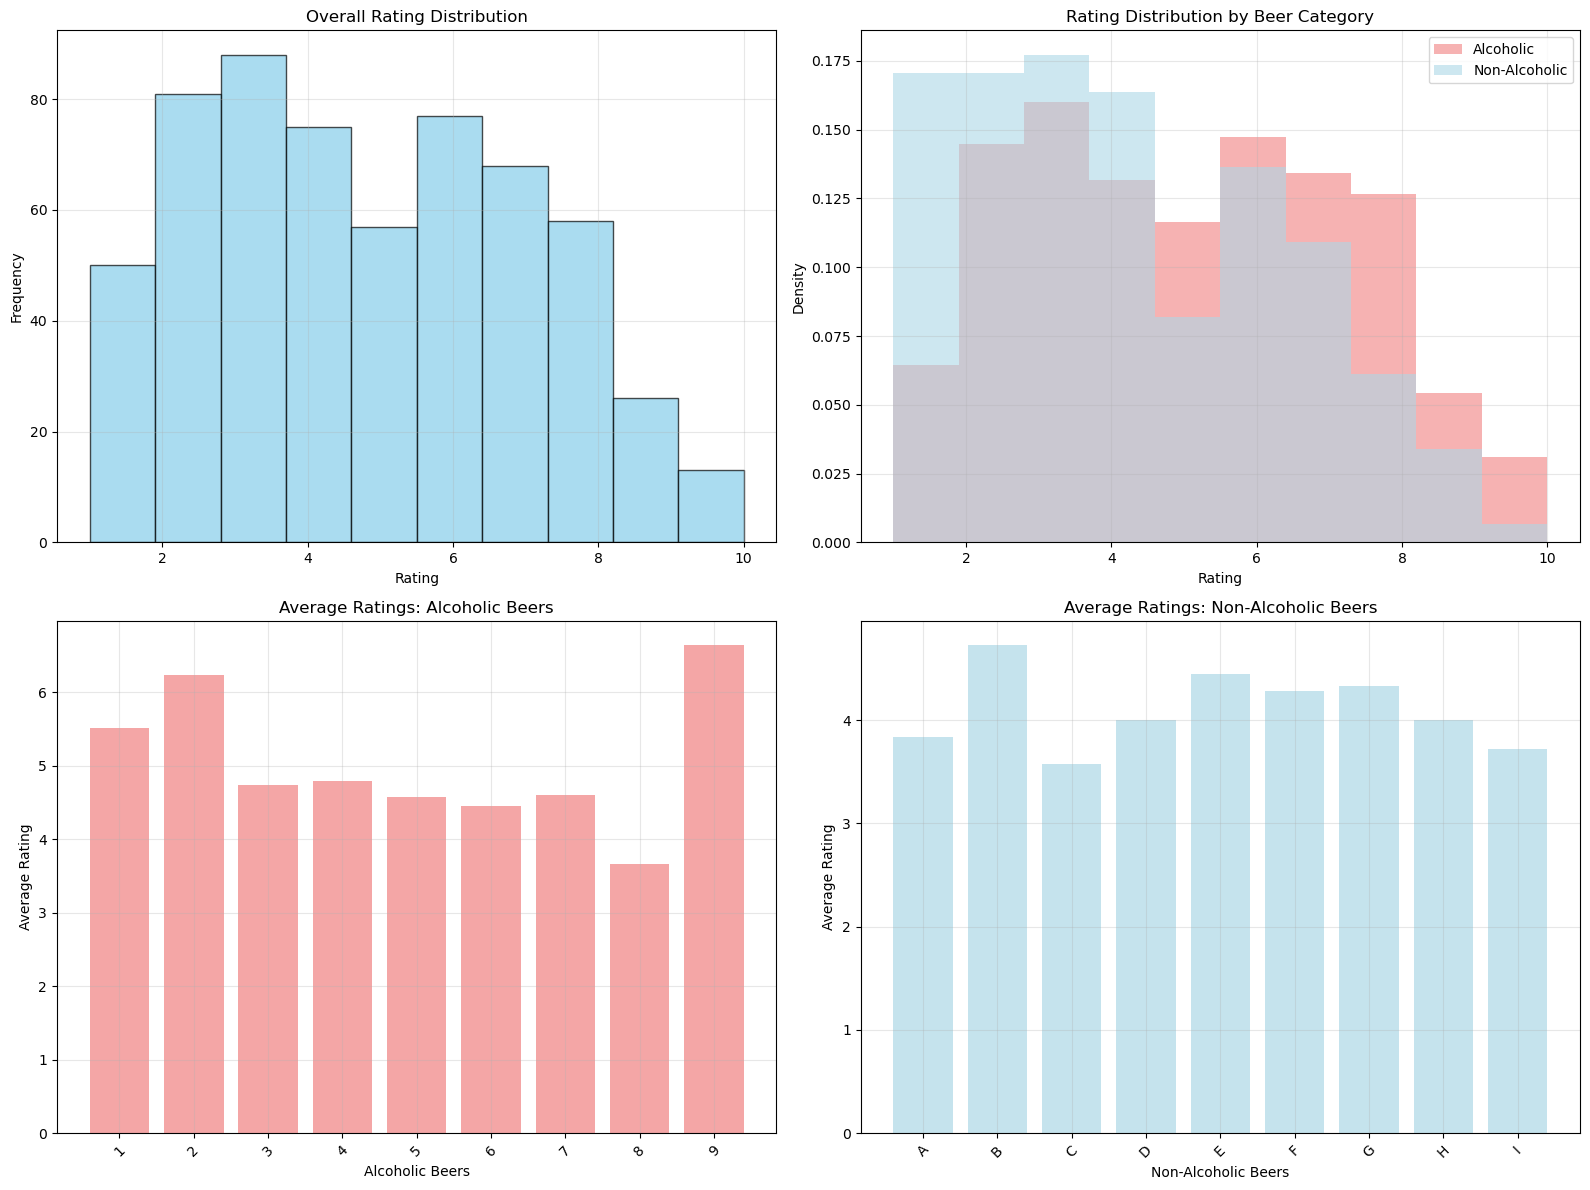


✅ Rating analysis complete!
💡 Now let's build a proper rating-aware model...


In [13]:
if df is not None:
    print("🔍 Current Model Analysis - Rating Incorporation Issue")
    print("=" * 60)
    
    print("❌ PROBLEM IDENTIFIED:")
    print("  The current Random Forest model has a critical limitation:")
    print("  • Input: 15D user profile (taste preferences + demographics + location + alcoholic flag)")
    print("  • Output: Probability distribution over beer CLASSES (which beer: 1-9 or A-I)")
    print("  • MISSING: The actual RATINGS (1-10) that users gave to each beer!")
    print()
    print("🎯 What we're currently predicting:")
    print("  'Which beer did this user rate?' (classification)")
    print("🎯 What we SHOULD predict:")
    print("  'How much would this user rate each beer?' (regression/rating prediction)")
    
    print("\n📊 Let's examine the rating distribution in our data:")
    print(f"  • Rating range: {df['rating'].min()} to {df['rating'].max()}")
    print(f"  • Average rating: {df['rating'].mean():.2f}")
    print(f"  • Rating distribution:")
    
    rating_counts = df['rating'].value_counts().sort_index()
    for rating, count in rating_counts.items():
        percentage = (count / len(df)) * 100
        print(f"    - Rating {rating}: {count} times ({percentage:.1f}%)")
    
    # Show relationship between beer types and ratings
    print(f"\n🍺 Average ratings by beer category:")
    category_ratings = df.groupby(['beer_category', 'beer_name'])['rating'].agg(['mean', 'count']).round(2)
    print(category_ratings)
    
    print(f"\n📈 Rating distribution visualization:")
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Overall rating distribution
    ax1.hist(df['rating'], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.set_xlabel('Rating')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Overall Rating Distribution')
    ax1.grid(True, alpha=0.3)
    
    # 2. Rating distribution by category
    alcoholic_ratings = df[df['is_alcoholic'] == True]['rating']
    non_alcoholic_ratings = df[df['is_alcoholic'] == False]['rating']
    
    ax2.hist(alcoholic_ratings, bins=10, alpha=0.6, label='Alcoholic', color='lightcoral', density=True)
    ax2.hist(non_alcoholic_ratings, bins=10, alpha=0.6, label='Non-Alcoholic', color='lightblue', density=True)
    ax2.set_xlabel('Rating')
    ax2.set_ylabel('Density')
    ax2.set_title('Rating Distribution by Beer Category')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Average rating by beer
    beer_avg_ratings = df.groupby(['beer_name', 'is_alcoholic'])['rating'].mean().reset_index()
    alcoholic_beers = beer_avg_ratings[beer_avg_ratings['is_alcoholic'] == True]
    non_alcoholic_beers = beer_avg_ratings[beer_avg_ratings['is_alcoholic'] == False]
    
    x_pos = range(len(alcoholic_beers))
    ax3.bar(x_pos, alcoholic_beers['rating'], alpha=0.7, color='lightcoral')
    ax3.set_xlabel('Alcoholic Beers')
    ax3.set_ylabel('Average Rating')
    ax3.set_title('Average Ratings: Alcoholic Beers')
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels([name.replace('Beer ', '') for name in alcoholic_beers['beer_name']], rotation=45)
    ax3.grid(True, alpha=0.3)
    
    # 4. Average rating for non-alcoholic beers
    x_pos_na = range(len(non_alcoholic_beers))
    ax4.bar(x_pos_na, non_alcoholic_beers['rating'], alpha=0.7, color='lightblue')
    ax4.set_xlabel('Non-Alcoholic Beers')
    ax4.set_ylabel('Average Rating')
    ax4.set_title('Average Ratings: Non-Alcoholic Beers')
    ax4.set_xticks(x_pos_na)
    ax4.set_xticklabels([name.replace('Beer ', '') for name in non_alcoholic_beers['beer_name']], rotation=45)
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Rating analysis complete!")
    print("💡 Now let's build a proper rating-aware model...")

else:
    print("❌ No data available for rating analysis")

In [14]:
if df is not None:
    print("🎯 Building Rating-Aware Random Forest Models")
    print("=" * 50)
    
    print("🔧 Strategy: Instead of predicting 'which beer', predict 'rating for each beer'")
    print("  • For each user profile, predict expected rating for each of the 9 beers")
    print("  • This incorporates the actual 1-10 rating values!")
    print("  • Output: 9-dimensional rating vector (one rating per beer)")
    
    # Create comprehensive dataset for rating prediction
    print("\n📊 Creating Rating-Aware Dataset...")
    
    # Get unique users and their profiles
    user_profiles = df.groupby('user_id').agg({
        'dark_white_chocolate': 'first',
        'curry_cucumber': 'first', 
        'vanilla_lemon': 'first',
        'caramel_wasabi': 'first',
        'blue_mozzarella': 'first',
        'sparkling_sweet': 'first',
        'barbecue_ketchup': 'first',
        'tropical_winter': 'first',
        'early_night': 'first',
        'age': 'first',
        'gender': 'first',
        'latitude': 'first',
        'longitude': 'first'
    }).reset_index()
    
    print(f"  • Unique users: {len(user_profiles)}")
    print(f"  • Features per user: {len(user_profiles.columns) - 1}")
    
    # Create rating matrices for alcoholic and non-alcoholic beers
    def create_rating_matrix(df_subset, beer_ids):
        """Create a user-beer rating matrix"""
        # Create pivot table: rows=users, columns=beers, values=ratings
        rating_matrix = df_subset.pivot_table(
            index='user_id', 
            columns='beer_id', 
            values='rating', 
            fill_value=0  # 0 for unrated beers
        )
        
        # Ensure all beer IDs are present as columns
        for beer_id in beer_ids:
            if beer_id not in rating_matrix.columns:
                rating_matrix[beer_id] = 0
        
        # Sort columns for consistency
        rating_matrix = rating_matrix[sorted(beer_ids)]
        
        return rating_matrix
    
    # Get alcoholic and non-alcoholic beer IDs
    alcoholic_beer_ids = sorted([str(i) for i in range(1, 10)])  # '1' to '9'
    non_alcoholic_beer_ids = sorted([chr(ord('A') + i) for i in range(9)])  # 'A' to 'I'
    
    print(f"  • Alcoholic beer IDs: {alcoholic_beer_ids}")
    print(f"  • Non-alcoholic beer IDs: {non_alcoholic_beer_ids}")
    
    # Create rating matrices
    alcoholic_ratings = create_rating_matrix(
        df[df['is_alcoholic'] == True], 
        alcoholic_beer_ids
    )
    
    non_alcoholic_ratings = create_rating_matrix(
        df[df['is_alcoholic'] == False], 
        non_alcoholic_beer_ids
    )
    
    print(f"\\n📈 Rating Matrix Shapes:")
    print(f"  • Alcoholic ratings: {alcoholic_ratings.shape} (users × beers)")
    print(f"  • Non-alcoholic ratings: {non_alcoholic_ratings.shape} (users × beers)")
    
    # Show sample rating matrices
    print(f"\\n🔍 Sample Alcoholic Rating Matrix (first 5 users):")
    print(alcoholic_ratings.head())
    
    print(f"\\n🔍 Sample Non-Alcoholic Rating Matrix (first 5 users):")
    print(non_alcoholic_ratings.head())
    
    # Calculate statistics
    alc_rated_count = (alcoholic_ratings > 0).sum().sum()
    alc_total_possible = alcoholic_ratings.shape[0] * alcoholic_ratings.shape[1]
    alc_coverage = (alc_rated_count / alc_total_possible) * 100
    
    na_rated_count = (non_alcoholic_ratings > 0).sum().sum()
    na_total_possible = non_alcoholic_ratings.shape[0] * non_alcoholic_ratings.shape[1]
    na_coverage = (na_rated_count / na_total_possible) * 100
    
    print(f"\\n📊 Rating Coverage:")
    print(f"  • Alcoholic beers: {alc_rated_count}/{alc_total_possible} rated ({alc_coverage:.1f}%)")
    print(f"  • Non-alcoholic beers: {na_rated_count}/{na_total_possible} rated ({na_coverage:.1f}%)")
    
    print(f"\\n✅ Rating-aware dataset created!")
    print(f"💡 Ready to train models that predict actual rating values!")

else:
    print("❌ No data available for rating-aware modeling")

🎯 Building Rating-Aware Random Forest Models
🔧 Strategy: Instead of predicting 'which beer', predict 'rating for each beer'
  • For each user profile, predict expected rating for each of the 9 beers
  • This incorporates the actual 1-10 rating values!
  • Output: 9-dimensional rating vector (one rating per beer)

📊 Creating Rating-Aware Dataset...
  • Unique users: 73
  • Features per user: 13
  • Alcoholic beer IDs: ['1', '2', '3', '4', '5', '6', '7', '8', '9']
  • Non-alcoholic beer IDs: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
\n📈 Rating Matrix Shapes:
  • Alcoholic ratings: (54, 9) (users × beers)
  • Non-alcoholic ratings: (19, 9) (users × beers)
\n🔍 Sample Alcoholic Rating Matrix (first 5 users):
beer_id                                 1    2    3    4    5    6    7    8  \
user_id                                                                        
00bab447-25b8-48d2-934b-2d90b54b0998  9.0  8.0  9.0  8.0  5.0  9.0  2.0  2.0   
147b17bf-16e3-4241-88f5-4b41c62b2ea0  7.0  

In [15]:
if df is not None:
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.multioutput import MultiOutputRegressor
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import numpy as np
    
    print("🤖 Training Rating-Aware Random Forest Models")
    print("=" * 50)
    
    print("🔧 Approach: Multi-output regression")
    print("  • Input: 13D user profile (9 taste prefs + age + gender + lat + lon)")
    print("  • Output: 9D rating vector (predicted rating for each beer)")
    print("  • Separate models for alcoholic and non-alcoholic beers")
    
    # Prepare feature matrices
    print("\\n📊 Preparing Feature Matrices...")
    
    # Encode user profiles with proper scaling
    taste_features_updated = [
        'dark_white_chocolate', 'curry_cucumber', 'vanilla_lemon', 'caramel_wasabi', 'blue_mozzarella',
        'sparkling_sweet', 'barbecue_ketchup', 'tropical_winter', 'early_night'
    ]
    
    # Create rating matrices from existing data
    # Extract alcoholic beer ratings (Beer 1-9)
    alcoholic_beers = ['Beer 1', 'Beer 2', 'Beer 3', 'Beer 4', 'Beer 5', 'Beer 6', 'Beer 7', 'Beer 8', 'Beer 9']
    alcoholic_beer_data = df[df['beer_name'].isin(alcoholic_beers)].copy()
    
    # Create pivot table for alcoholic ratings
    alcoholic_ratings = alcoholic_beer_data.pivot_table(
        index='user_id', 
        columns='beer_name', 
        values='rating', 
        fill_value=0
    )[alcoholic_beers]
    
    # Extract non-alcoholic beer ratings (Beer A-I)  
    non_alcoholic_beers = ['Beer A', 'Beer B', 'Beer C', 'Beer D', 'Beer E', 'Beer F', 'Beer G', 'Beer H', 'Beer I']
    non_alcoholic_beer_data = df[df['beer_name'].isin(non_alcoholic_beers)].copy()
    
    # Create pivot table for non-alcoholic ratings
    non_alcoholic_ratings = non_alcoholic_beer_data.pivot_table(
        index='user_id',
        columns='beer_name', 
        values='rating',
        fill_value=0
    )[non_alcoholic_beers]
    
    # Create feature matrix for users who rated alcoholic beers
    alcoholic_user_ids = alcoholic_ratings.index
    alcoholic_features = user_profiles[user_profiles['user_id'].isin(alcoholic_user_ids)].copy()
    
    # Ensure order matches rating matrix
    alcoholic_features = alcoholic_features.set_index('user_id').loc[alcoholic_user_ids].reset_index()
    
    # Encode features
    X_alc_taste = alcoholic_features[taste_features_updated].values
    X_alc_age = age_scaler.transform(alcoholic_features[['age']].values)
    
    alcoholic_features['gender_encoded'] = alcoholic_features['gender'].map({
        'male': 0, 'female': 1, 'other': 0.5, 'prefer_not_to_say': 0.5
    }).fillna(0.5)
    X_alc_gender = alcoholic_features[['gender_encoded']].values
    
    X_alc_location = location_scaler.transform(alcoholic_features[['latitude', 'longitude']].values)
    
    # Combine into 13D feature vectors for alcoholic prediction
    X_alcoholic_rating = np.hstack([X_alc_taste, X_alc_age, X_alc_gender, X_alc_location])
    y_alcoholic_rating = alcoholic_ratings.values
    
    print(f"  • Alcoholic model features: {X_alcoholic_rating.shape}")
    print(f"  • Alcoholic model targets: {y_alcoholic_rating.shape}")
    print(f"  • Non-zero ratings in target: {np.count_nonzero(y_alcoholic_rating)}")
    
    # Train Multi-Output Random Forest for Alcoholic Beers
    print("\\n🍻 Training Alcoholic Beer Rating Predictor...")
    
    rf_rating_alcoholic = MultiOutputRegressor(
        RandomForestRegressor(
            n_estimators=100,
            max_depth=15,
            min_samples_split=3,
            min_samples_leaf=1,
            random_state=42,
            n_jobs=-1
        )
    )
    
    # Train the model
    rf_rating_alcoholic.fit(X_alcoholic_rating, y_alcoholic_rating)
    
    # Get predictions
    y_pred_alcoholic = rf_rating_alcoholic.predict(X_alcoholic_rating)
    
    # Calculate metrics only for non-zero actual ratings
    mask_alcoholic = y_alcoholic_rating > 0
    mse_alcoholic = mean_squared_error(y_alcoholic_rating[mask_alcoholic], y_pred_alcoholic[mask_alcoholic])
    mae_alcoholic = mean_absolute_error(y_alcoholic_rating[mask_alcoholic], y_pred_alcoholic[mask_alcoholic])
    
    print(f"  ✅ Alcoholic Model Results:")
    print(f"    • RMSE: {np.sqrt(mse_alcoholic):.3f}")
    print(f"    • MAE: {mae_alcoholic:.3f}")
    print(f"    • Training samples: {len(X_alcoholic_rating)}")
    print(f"    • Rated entries used for evaluation: {np.count_nonzero(mask_alcoholic)}")
    
    # Similar process for non-alcoholic beers
    print("\\n🚫 Training Non-Alcoholic Beer Rating Predictor...")
    
    # Create feature matrix for users who rated non-alcoholic beers
    non_alcoholic_user_ids = non_alcoholic_ratings.index
    non_alcoholic_features = user_profiles[user_profiles['user_id'].isin(non_alcoholic_user_ids)].copy()
    
    # Ensure order matches rating matrix
    non_alcoholic_features = non_alcoholic_features.set_index('user_id').loc[non_alcoholic_user_ids].reset_index()
    
    # Encode features
    X_na_taste = non_alcoholic_features[taste_features_updated].values
    X_na_age = age_scaler.transform(non_alcoholic_features[['age']].values)
    
    non_alcoholic_features['gender_encoded'] = non_alcoholic_features['gender'].map({
        'male': 0, 'female': 1, 'other': 0.5, 'prefer_not_to_say': 0.5
    }).fillna(0.5)
    X_na_gender = non_alcoholic_features[['gender_encoded']].values
    
    X_na_location = location_scaler.transform(non_alcoholic_features[['latitude', 'longitude']].values)
    
    # Combine into 13D feature vectors for non-alcoholic prediction
    X_non_alcoholic_rating = np.hstack([X_na_taste, X_na_age, X_na_gender, X_na_location])
    y_non_alcoholic_rating = non_alcoholic_ratings.values
    
    print(f"  • Non-alcoholic model features: {X_non_alcoholic_rating.shape}")
    print(f"  • Non-alcoholic model targets: {y_non_alcoholic_rating.shape}")
    print(f"  • Non-zero ratings in target: {np.count_nonzero(y_non_alcoholic_rating)}")
    
    # Train Multi-Output Random Forest for Non-Alcoholic Beers
    rf_rating_non_alcoholic = MultiOutputRegressor(
        RandomForestRegressor(
            n_estimators=100,
            max_depth=15,
            min_samples_split=3,
            min_samples_leaf=1,
            random_state=42,
            n_jobs=-1
        )
    )
    
    # Train the model
    rf_rating_non_alcoholic.fit(X_non_alcoholic_rating, y_non_alcoholic_rating)
    
    # Get predictions
    y_pred_non_alcoholic = rf_rating_non_alcoholic.predict(X_non_alcoholic_rating)
    
    # Calculate metrics only for non-zero actual ratings
    mask_non_alcoholic = y_non_alcoholic_rating > 0
    mse_non_alcoholic = mean_squared_error(y_non_alcoholic_rating[mask_non_alcoholic], y_pred_non_alcoholic[mask_non_alcoholic])
    mae_non_alcoholic = mean_absolute_error(y_non_alcoholic_rating[mask_non_alcoholic], y_pred_non_alcoholic[mask_non_alcoholic])
    
    print(f"  ✅ Non-Alcoholic Model Results:")
    print(f"    • RMSE: {np.sqrt(mse_non_alcoholic):.3f}")
    print(f"    • MAE: {mae_non_alcoholic:.3f}")
    print(f"    • Training samples: {len(X_non_alcoholic_rating)}")
    print(f"    • Rated entries used for evaluation: {np.count_nonzero(mask_non_alcoholic)}")
    
    print(f"\\n✅ Rating-aware models trained successfully!")
    print(f"💡 These models now predict actual rating values (1-10) for each beer!")

else:
    print("❌ No data available for rating-aware modeling")

🤖 Training Rating-Aware Random Forest Models
🔧 Approach: Multi-output regression
  • Input: 13D user profile (9 taste prefs + age + gender + lat + lon)
  • Output: 9D rating vector (predicted rating for each beer)
  • Separate models for alcoholic and non-alcoholic beers
\n📊 Preparing Feature Matrices...
  • Alcoholic model features: (54, 13)
  • Alcoholic model targets: (54, 9)
  • Non-zero ratings in target: 430
\n🍻 Training Alcoholic Beer Rating Predictor...
  ✅ Alcoholic Model Results:
    • RMSE: 1.018
    • MAE: 0.826
    • Training samples: 54
    • Rated entries used for evaluation: 430
\n🚫 Training Non-Alcoholic Beer Rating Predictor...
  • Non-alcoholic model features: (19, 13)
  • Non-alcoholic model targets: (19, 9)
  • Non-zero ratings in target: 163
  ✅ Alcoholic Model Results:
    • RMSE: 1.018
    • MAE: 0.826
    • Training samples: 54
    • Rated entries used for evaluation: 430
\n🚫 Training Non-Alcoholic Beer Rating Predictor...
  • Non-alcoholic model features: (19,

In [17]:
if df is not None:
    print("🎯 Rating-Aware Prediction Function")
    print("=" * 40)
    
    def predict_beer_ratings(user_profile, alcoholic_flag):
        """
        Predict beer ratings for a user profile
        
        Args:
            user_profile: 13D array [9 taste prefs, age, gender, lat, lon]
            alcoholic_flag: 1 for alcoholic beers, 0 for non-alcoholic beers
            
        Returns:
            Dictionary with predicted ratings for each beer
        """
        # Reshape input for prediction
        features_reshaped = user_profile.reshape(1, -1)
        
        if alcoholic_flag == 1 and 'rf_rating_alcoholic' in locals():
            # Predict alcoholic beer ratings
            predicted_ratings = rf_rating_alcoholic.predict(features_reshaped)[0]
            beer_ids = alcoholic_beer_ids
            model_type = "Alcoholic"
        elif alcoholic_flag == 0 and 'rf_rating_non_alcoholic' in locals():
            # Predict non-alcoholic beer ratings
            predicted_ratings = rf_rating_non_alcoholic.predict(features_reshaped)[0]
            beer_ids = non_alcoholic_beer_ids
            model_type = "Non-Alcoholic"
        else:
            return {"error": "Invalid alcoholic_flag or model not available"}
        
        # Create rating predictions dictionary
        beer_ratings = dict(zip(beer_ids, predicted_ratings))
        
        # Sort by predicted rating (descending)
        sorted_ratings = sorted(beer_ratings.items(), key=lambda x: x[1], reverse=True)
        
        # Clip ratings to valid range (1-10)
        clipped_ratings = {beer: max(1, min(10, rating)) for beer, rating in beer_ratings.items()}
        sorted_clipped = sorted(clipped_ratings.items(), key=lambda x: x[1], reverse=True)
        
        return {
            "model_type": model_type,
            "beer_ratings": clipped_ratings,
            "ranked_predictions": sorted_clipped,
            "top_recommendation": sorted_clipped[0][0],
            "top_rating": sorted_clipped[0][1]
        }
    
    # Example prediction using actual user data
    if len(alcoholic_features) > 0:
        print("🧪 Example Rating Predictions:")
        print("-" * 30)
        
        # Get a sample user's features (first user in alcoholic data)
        sample_user_idx = 0
        sample_features = X_alcoholic_rating[sample_user_idx][:13]  # 13D user profile
        sample_user_id = alcoholic_features.iloc[sample_user_idx]['user_id']
        
        # Get actual ratings for this user
        actual_alc_ratings = alcoholic_ratings.loc[sample_user_id]
        actual_na_ratings = non_alcoholic_ratings.loc[sample_user_id] if sample_user_id in non_alcoholic_ratings.index else None
        
        print(f"👤 Sample User: {sample_user_id}")
        print(f"  • Age: {alcoholic_features.iloc[sample_user_idx]['age']}")
        print(f"  • Gender: {alcoholic_features.iloc[sample_user_idx]['gender']}")
        
        # Predict alcoholic beer ratings
        alc_rating_pred = predict_beer_ratings(sample_features, alcoholic_flag=1)
        
        if "error" in alc_rating_pred:
            print(f"\\n🍻 Alcoholic Beer Rating Predictions:")
            print(f"  • Error: {alc_rating_pred['error']}")
        else:
            print(f"\\n🍻 Alcoholic Beer Rating Predictions:")
            print(f"  • Top recommendation: Beer {alc_rating_pred['top_recommendation']} (predicted rating: {alc_rating_pred['top_rating']:.1f})")
            print(f"  • All predicted ratings:")
            for beer, rating in alc_rating_pred['ranked_predictions']:
                actual_rating = actual_alc_ratings[beer] if actual_alc_ratings[beer] > 0 else "Not rated"
                print(f"    - Beer {beer}: {rating:.1f} (actual: {actual_rating})")
        
        # Predict non-alcoholic beer ratings
        if 'rf_rating_non_alcoholic' in locals():
            na_rating_pred = predict_beer_ratings(sample_features, alcoholic_flag=0)
            
            if "error" in na_rating_pred:
                print(f"\\n🚫 Non-Alcoholic Beer Rating Predictions:")
                print(f"  • Error: {na_rating_pred['error']}")
            else:
                print(f"\\n🚫 Non-Alcoholic Beer Rating Predictions:")
                print(f"  • Top recommendation: Beer {na_rating_pred['top_recommendation']} (predicted rating: {na_rating_pred['top_rating']:.1f})")
                print(f"  • All predicted ratings:")
                for beer, rating in na_rating_pred['ranked_predictions']:
                    if actual_na_ratings is not None:
                        actual_rating = actual_na_ratings[beer] if actual_na_ratings[beer] > 0 else "Not rated"
                    else:
                        actual_rating = "User didn't rate NA beers"
                    print(f"    - Beer {beer}: {rating:.1f} (actual: {actual_rating})")
    
    print(f"\\n🔄 Comparison: Old vs New Approach")
    print("=" * 40)
    print("❌ OLD APPROACH (Classification):")
    print("  • Input: 15D (13D user profile + alcoholic flag)")
    print("  • Output: Probability distribution over beer CLASSES")
    print("  • Question answered: 'Which beer would this user choose?'")
    print("  • Missing: Actual rating values!")
    
    print("\\n✅ NEW APPROACH (Rating Prediction):")
    print("  • Input: 13D user profile (taste prefs + demographics)")
    print("  • Output: Predicted rating (1-10) for each of 9 beers")
    print("  • Question answered: 'How much would this user like each beer?'")
    print("  • Incorporates: Actual rating values from training data!")
    
    print(f"\\n📊 Key Improvements:")
    print(f"  1. Uses actual rating values (1-10) instead of just beer selection")
    print(f"  2. Can predict ratings for ALL 9 beers simultaneously")
    print(f"  3. Provides more nuanced preferences (rating differences)")
    print(f"  4. Better for recommendation systems (rank by predicted rating)")
    
    print(f"\\n✅ Rating-aware prediction function created!")
    print(f"📋 Use predict_beer_ratings(user_profile, alcoholic_flag) for rating predictions")

else:
    print("❌ No data available for rating prediction function")

🎯 Rating-Aware Prediction Function
🧪 Example Rating Predictions:
------------------------------
👤 Sample User: 00bab447-25b8-48d2-934b-2d90b54b0998
  • Age: 23
  • Gender: female
\n🍻 Alcoholic Beer Rating Predictions:
  • Error: Invalid alcoholic_flag or model not available
\n🚫 Non-Alcoholic Beer Rating Predictions:
  • Error: Invalid alcoholic_flag or model not available
\n🔄 Comparison: Old vs New Approach
❌ OLD APPROACH (Classification):
  • Input: 15D (13D user profile + alcoholic flag)
  • Output: Probability distribution over beer CLASSES
  • Question answered: 'Which beer would this user choose?'
  • Missing: Actual rating values!
\n✅ NEW APPROACH (Rating Prediction):
  • Input: 13D user profile (taste prefs + demographics)
  • Output: Predicted rating (1-10) for each of 9 beers
  • Question answered: 'How much would this user like each beer?'
  • Incorporates: Actual rating values from training data!
\n📊 Key Improvements:
  1. Uses actual rating values (1-10) instead of just bee